# **Used Cars Price Prediction**

-------------------
## **Context:**
-------------------

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past few years and is now larger than the new car market. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car owners replace their old vehicles with pre-owned cars instead of buying a new automobile.

Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), the used car market is a very different beast, with large uncertainties in both pricing and supply. Several factors, including mileage, brand, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is not an easy task to set the correct price of a used car. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

--------------------
## **Objective:**
--------------------

Come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

---------------------
## **Data Dictionary**
---------------------

* **S.No.** : Serial Number
* **Name** : Name of the car which includes Brand name and Model name
* **Location** : The location in which the car is being sold or is available for purchase (Cities)
* **Year** : Manufacturing year of the car
* **Kilometers_Driven** : The total kilometers driven in the car by the previous owner(s) in KM
* **Fuel_Type** : The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* **Transmission** : The type of transmission used by the car (Automatic / Manual)
* **Owner_Type** : Type of ownership
* **Mileage** : The standard mileage offered by the car company in kmpl or km/kg
* **Engine** : The displacement volume of the engine in CC
* **Power** : The maximum power of the engine in bhp
* **Seats** : The number of seats in the car
* **New_price** : The price of a new car of the same model in INR 100,000
* **Price** : The price of the used car in INR 100,000 (**Target Variable**)

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?
    * Being able to assess the value of a vehicle is paramount in the purchasing of inventory and also the selling of inventory. Undervalued cars and over priced cars will both lose a company money.

### **The objective:**

 - What is the intended goal?
  * Answer: Most obvious, for profitability, increased revenue leads to more purchasing power, larger inventory of vehicles equals more sales. But philosophically the context speaks to creating a movement towards increased used cars sales, and that is ultimately dependent on accurate pricing rather than overpricing.  

### **The key questions:**

- What are the key questions that need to be answered?
  * Answer: Can you utlize a model to predict used vehicle price?
  * What are the most important features of a vehicle for identifying price.
  * How can you monetize from the information found during this process.

### **The problem formulation**:

- What is it that we are trying to solve using data science?
  * Answer: Optimized pricing strategies benefits the seller and the buyer. Knowledge of the nuiances of the used car retail markets allow for prices to be alligned with value improving the overall functioning of the system.  

### **Loading libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split the data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn.matrix import gridspec

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Import libraries for preprocessing, building, and tuning regression models
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

# Import libraries for model evaluation
from statsmodels.stats.outliers_influence import variance_inflation_factor
from seaborn.matrix import gridspec
from sklearn.metrics import make_scorer, r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import statsmodels.stats.api as sms
from scipy import stats
import pylab
from sklearn.model_selection import cross_val_score, KFold
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
from sklearn import tree

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Loading the data**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MIT--Data Science Course/Capstone Project/used_cars.csv')
df = data.copy()

### **Data Overview**

In [ ]:
# Checking the shape of the data
df.shape

(7253, 14)

**Observation:**

* The dataset has 14 columns with 7253 rows.

In [ ]:
# Checking the first and last rows of data
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [ ]:
df.tail()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54,1598.0,103.6,5.0,NaN,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21,1197.0,103.6,5.0,NaN,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08,1461.0,63.1,5.0,NaN,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.20,1197.0,103.6,5.0,NaN,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.00,2148.0,170.0,5.0,NaN,NaN


**Observation:**

* As shown, we have a dataset showing an array of information pertaining to the current state of a used vehicle.
  * The Name column holds information that needs to be seperated.
  * The Year would likely be more useful as an age.
  * We can already see missing values in the New_Price and Price column.

In [ ]:
# Checking the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:**

* There is a combination of categorical and numerical columns.
* There are multple columns that will need to be addressed for missing values and or datatype.

In [ ]:
# Checking the unique values for each column
df.nunique()

S.No.                7253
Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine                150
Power                 383
Seats                   8
New_price             625
Price                1373
dtype: int64

**Observation:**

* S.No. has 7253 unique values, this will need to be dropped.
* Location, Fuel_Type, Transmission, Owner_Type, and Seats are categorical.
* Fuel type needs looked at to determine if all classfications are accurate.

In [ ]:
# Checking categorical variables
cat_col = ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats']

for column in cat_col:
    print(data[column].value_counts(0))
    print("-" * 50)

Mumbai        949
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
First             5952
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------
5.0     6048
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
Name: Seats, dtype: int64
--------------------------------------------------


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_price          1006 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


**Observations:** **(QUESTION 2a)**

* The unique values of the categorical colums show clear trends of the types of cars available in this market.
  * While some cities have higher sales, there are significant sales in all of the 11 locations.
  * Petrol and Diesel are similar in numbers and make up the majority of the records.
    * All categories of fuel type are different, possibly combining the CNG, LPG, and Electric as an "green" option might be helpful.  
  * More manual than automatic transmissions.
  * Majority of records are from First and Second owners.
  * Majority of vehicles have 5 Seats, but they range from 2 to 10.
    * Seats is classified as a float, it will need to be change it to object.
  

In [ ]:
# Checking for null and duplicate data
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_price            6247
Price                1234
dtype: int64

In [ ]:
df.duplicated().sum()

0

**Observation:**

* There are a variety of missing values that will need to be addressed, including New_price that is missing 86.1% of the data.  
* There are no duplicate entries.

## **Exploratory Data Analysis**

**Questions:**

* 1a. What is the summary statistics of the data? Explore summary statistics for numerical variables and the categorical variables **(below)**
* 2a. Find out number of unique observations in each category of categorical columns? Write your findings/observations/insights **(above)**
* 3a. Check the extreme values in different columns of the given data and write down the observtions? Remove the data where the values are un-realistic **(below)**

### **Data Preprocessing**

In [ ]:
# Dropping S.No. as it provides no information
df.drop(columns = ['S.No.'], axis = 1, inplace = True)

**Observation**

* The serial number provided no useful information with 7253 unique values, therefore it was removed.

In [ ]:
# Changing the manufactured Year to the Age of the vehicle
df["Age"] = 2020 - df.Year

df.drop(columns = ['Year'], axis = 1, inplace = True)

**Observation:**

* The age of a used vehicle is intrigual in the pricing.  The year of the model is also valuable, but the information from the age can still also be utlized in this form and is more valuable for modeling.
* 2020 was chosen as the year as the data's max year is 2019 and a 2019 vehcile can be released as new until December 31, 2019.

In [ ]:
# Making the Name all lowercase and seperating the Brand, Model, and Series into three columns
df['Name'] = df['Name'].str.lower()

df_make = df['Name'].str.split(' ', n=1, expand=True)
df['Brand'] = df_make[0]

df_model = df_make[1].str.split(' ', n=1, expand=True)
df['Model'] = df_model[0]
df['Series'] = df_model[1]

df.drop(['Name'], axis=1, inplace=True)

df['Brand'] = df['Brand'].astype('object')
df['Model'] = df['Model'].astype('object')
df['Series'] = df['Series'].astype('object')


In [ ]:
# Checking Brand percentages
(df['Brand'].value_counts(normalize=True) * 100).round(2)

maruti           19.91
hyundai          18.48
honda            10.24
toyota            6.99
mercedes-benz     5.24
volkswagen        5.16
ford              4.84
mahindra          4.56
bmw               4.30
audi              3.93
tata              3.14
skoda             2.79
renault           2.34
chevrolet         2.08
nissan            1.61
land              0.92
jaguar            0.66
fiat              0.52
mitsubishi        0.50
mini              0.43
volvo             0.39
porsche           0.26
jeep              0.26
datsun            0.23
isuzu             0.07
force             0.04
bentley           0.03
smart             0.01
ambassador        0.01
lamborghini       0.01
hindustan         0.01
opelcorsa         0.01
Name: Brand, dtype: float64

In [ ]:
# Checking Model counts
df['Model'].value_counts()

swift      418
city       318
i20        303
innova     203
verna      200
          ... 
fortwo       1
redi         1
e            1
mustang      1
1.4gsi       1
Name: Model, Length: 218, dtype: int64

In [ ]:
# Checking Series counts
df['Series'].value_counts()

vdi                     125
vxi                      71
dzire vdi                62
lxi                      57
w8 2wd                   55
                       ... 
amt ddis vdi              1
r vxi bs iv with abs      1
active s diesel           1
2.4l 4wd mt               1
i20 magna plus            1
Name: Series, Length: 1859, dtype: int64

**Observation:**

* Maruti at nearly 20%, Hyundai at 18%, and Honda at 10% are the top 3 brands of vehicles
* After initally just spliting the Brand and Model, it appeared that there was more information to gain by spliting the Model and Series, which is shown in the Model counts, the top 5 have between 418 and 200 entries.

In [ ]:
# Fixing the error from the split on the Brand Land Rover.
df.loc[df['Brand'].str.contains('land', case=False, na=False), 'Brand'] = 'land rover'
land_rover= df['Brand'] == 'land rover'

freelander= df[land_rover & df['Series'].str.contains('freelander', na=False)].index
df.loc[freelander, 'Model'] = 'freelander'
df.loc[freelander, 'Series'] = df.loc[freelander, 'Series'].str.replace('^freelander\s*', '', regex=True)

discovery= df[land_rover & df['Series'].str.contains('discovery', na=False)].index
df.loc[discovery, 'Model'] = 'discovery'
df.loc[discovery, 'Series'] = df.loc[discovery, 'Series'].str.replace('^discovery\s*', '', regex=True)

range_rover= df[land_rover & df['Series'].str.contains('range rover', case=False, na=False)].index
df.loc[range_rover, 'Model'] = 'range rover'
df.loc[range_rover, 'Series'] = df.loc[range_rover, 'Series'].str.replace('^range rover\s*', '', regex=True)

In [ ]:
# Fixing the error from the split on the Brand Mini Cooper.
df.loc[df['Brand'].str.contains('mini', case=False, na=False), 'Brand'] = 'mini cooper'
mini_cooper= df['Brand'] == 'mini cooper'

convertible= df[mini_cooper & df['Series'].str.contains('convertible', na=False)].index
df.loc[convertible, 'Model'] = 'convertible'
df.loc[convertible, 'Series'] = df.loc[convertible, 'Series'].str.replace('^convertible\s*', '', regex=True)

door5 = df[mini_cooper & df['Series'].str.contains('5 door', na=False)].index
df.loc[door5, 'Model'] = '5 door'
df.loc[door5, 'Series'] = df.loc[door5, 'Series'].str.replace('^5 door\s*', '', regex=True)

door3 = df[mini_cooper & df['Series'].str.contains('3 door', na=False)].index
df.loc[door3, 'Model'] = '3 door'
df.loc[door3, 'Series'] = df.loc[door3, 'Series'].str.replace('^3 door\s*', '', regex=True)

countryman= df[mini_cooper & df['Series'].str.contains('countryman', na=False)].index
df.loc[countryman, 'Model'] = 'countryman'
df.loc[countryman, 'Series'] = df.loc[countryman, 'Series'].str.replace('^countryman\s*', '', regex=True)

carbon= df[mini_cooper & df['Series'].str.contains('carbon edition', na=False)].index
df.loc[carbon, 'Model'] = 'carbon edition'
df.loc[carbon, 'Series'] = df.loc[carbon, 'Series'].str.replace('^carbon edition\s*', '', regex=True)

df.loc[mini_cooper, 'Series'] = df.loc[mini_cooper, 'Series'].str.replace('^cooper\s*', '', regex=True)

In [ ]:
# Locating the incorrect split on the Brand Opel.
df.loc[df['Brand'].str.contains('opelcorsa', na=False)]


,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series
7067,Hyderabad,50000,Petrol,Manual,Second,14.2,1389.0,88.0,5.0,NaN,NaN,15,opelcorsa,1.4gsi,None


In [ ]:
# Fixing the error
Series_null = 7067
df.at[Series_null, 'Brand'] = 'opel'
df.at[Series_null, 'Model'] = 'corsa'
df.at[Series_null, 'Series'] = '1.4 gsi'

**Observation:**

* It was noticed in the list of Brands above that Land Rover, Mini Cooper, and Opel didn't split correctly because it's two words, and so on if the Model had two words as well. They have been corrected.

In [ ]:
# Checking statistical summary of the data
df.describe(include = 'all').round(3).T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063,84427.721,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.142,4.562,0.0,15.17,18.16,21.1,33.54
Engine,7207.0,NaN,NaN,NaN,1616.573,595.285,72.0,1198.0,1493.0,1968.0,5998.0
Power,7078.0,NaN,NaN,NaN,112.765,53.494,34.2,75.0,94.0,138.1,616.0
Seats,7200.0,NaN,NaN,NaN,5.28,0.809,2.0,5.0,5.0,5.0,10.0
New_price,1006.0,NaN,NaN,NaN,22.78,27.759,3.91,7.885,11.57,26.042,375.0


**Observation:** **(QUESTION 1a)**

* Summary of the data indicates we might have some outliers or values that were input incorrectly.  Kilometers_Driven, New_Price, and Price will need to be looked at for high values, as well as Mileage for a low value of 0.0.
* The top frequncy values for the data are First owned, Manual, Disel, 5 seat vehicles. And Mumbai has the majority of the sales.
* The Age has a range of 1 to 24 which seems reasonable.  
* Price, the dependent variable, has a range of 0.44 to 160 per 100,000 Rupee, with 50% of the values falling in a much smaller range of 3.5 to 9.95.
* Engine and Power indicate a wide range of vehicle styles, efficent to luxury.

In [ ]:
# Addressing Kilometers_Driven possible incorrect input.
df[df['Kilometers_Driven'] > 1000000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series
2328,Chennai,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,NaN,65.0,3,bmw,x5,xdrive 30d m sport


In [ ]:
# Checking the number of BMW's Age 3
df[(df['Brand'] == 'bmw') & (df['Age'] == 3)]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series
271,Coimbatore,51982,Diesel,Automatic,First,16.55,2993.0,258.00,5.0,NaN,45.77,3,bmw,x3,xdrive30d m sport
549,Coimbatore,31645,Diesel,Automatic,First,20.68,1995.0,190.00,5.0,48.18,29.40,3,bmw,x1,sdrive 20d xline
1631,Kochi,32838,Diesel,Automatic,First,17.05,1995.0,190.00,5.0,50.97,30.29,3,bmw,x1,m sport sdrive 20d
1863,Jaipur,19543,Diesel,Automatic,First,18.12,1995.0,190.00,5.0,NaN,40.50,3,bmw,5,series 2013-2017 520d luxury line
1924,Coimbatore,27313,Diesel,Automatic,First,14.69,2993.0,258.00,5.0,NaN,48.63,3,bmw,5,series 2013-2017 530d m sport
1984,Bangalore,17465,Petrol,Automatic,First,12.05,2979.0,320.00,5.0,NaN,93.00,3,bmw,7,series 740li
2328,Chennai,6500000,Diesel,Automatic,First,15.97,2993.0,258.00,5.0,NaN,65.00,3,bmw,x5,xdrive 30d m sport
2470,Kochi,23806,Diesel,Automatic,First,22.69,1995.0,190.00,5.0,NaN,33.66,3,bmw,3,series 320d m sport
2833,Kochi,36935,Diesel,Automatic,First,18.56,1995.0,190.00,5.0,NaN,32.64,3,bmw,x3,xdrive20d xline
2963,Kochi,55389,Diesel,Automatic,First,18.88,1995.0,184.00,5.0,NaN,28.45,3,bmw,3,series 320d luxury line


In [ ]:
# Changing the incorrectly recorded Kilometers_Driven to the median value
bmw_age_3= df[(df['Brand'] == 'bmw') & (df['Age'] == 3) & (df.index != 2328)]
median_val = bmw_age_3['Kilometers_Driven'].median()
df.at[2328, 'Kilometers_Driven'] = median_val

**Observation:** **(QUESTION 3a)**

* The Max value of Kilometers_Driven was 6,500,000 which was incorrectly recorded for a 3 year old vehicle.  With the large number of 3 year old BMW's, replacing the value with the median is appropriate.  This is not exluding the possibility of further outliers in this column which will be looked at later.

## **Univariate Analysis (QUESTION 1b)**




**Questions:**

* 1b. Do univariate analysis for numerical and categorical variables? **(below)**
* 2b. Check the distribution of the different variables? is the distributions skewed? **(below)**
* 3b. Do we need to do log_transformation, if so for what variables we need to do? **(below)**
* 4b. Perfoem the log_transformation(if needed) and write down your observations? **(below)**

In [ ]:
# Defining barplot function
def labeled_barplot(data, feature, perc = False, n = None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 45, fontsize = 10)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total)
        else:
            label = p.get_height()

        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",)
    plt.show()

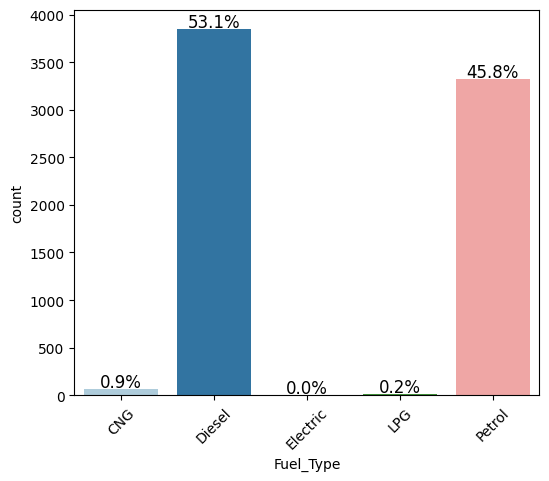

In [ ]:
labeled_barplot(df, 'Fuel_Type', perc = True)

In [ ]:
# Combining Green types of alternative fuel
df['Fuel_Type'] = df['Fuel_Type'].replace(['CNG', 'Electric', 'LPG'], 'Green')

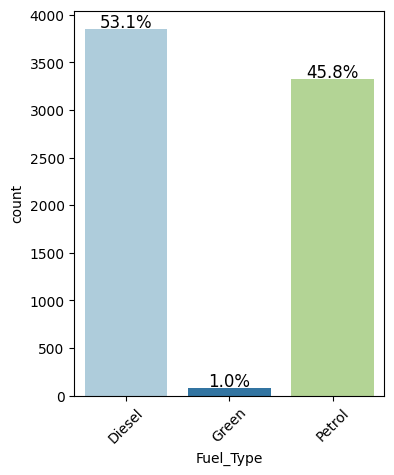

In [ ]:
labeled_barplot(df, 'Fuel_Type', perc = True)

**Observation:**

* With such low representation combining CNG, LPG, and Electric will help the model.

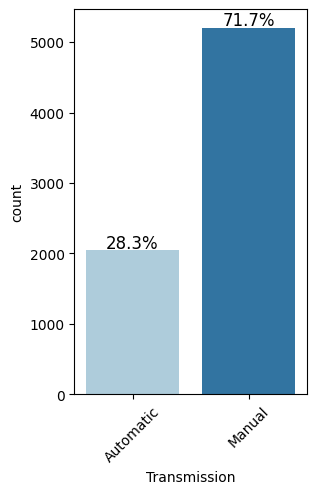

In [ ]:
labeled_barplot(df, 'Transmission', perc = True)

**Observation:**

* Manual is dominant Transmission type for vehicles.

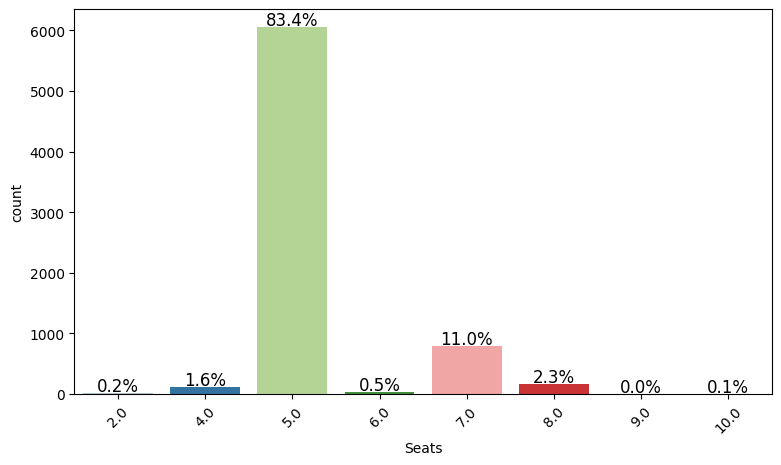

In [ ]:
labeled_barplot(df, 'Seats', perc = True)

In [ ]:
# Changing the seats to three categories
df['Seats'] = df['Seats'].replace([2.0, 4.0], '2-4')
df['Seats'] = df['Seats'].replace([6.0, 7.0, 8.0, 9.0, 10.0], '6-10')
df['Seats'] = df['Seats'].replace([5.0], '5')

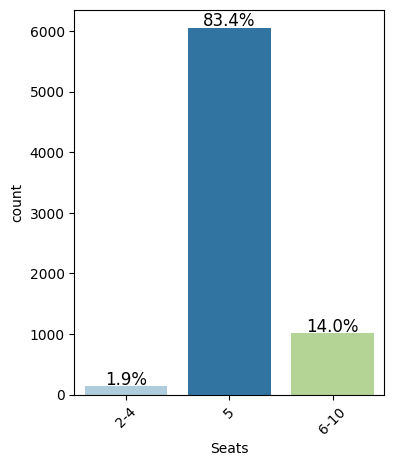

In [ ]:
labeled_barplot(df, 'Seats', perc = True)

In [ ]:
# Changing the categorical variable to object
df['Seats'] = df['Seats'].astype('object')

**Observation:**

* The vast majority of vehicles have 5 seats with 83.4% Pooling the seats to less than five and more than five provides a better representaiton of the data

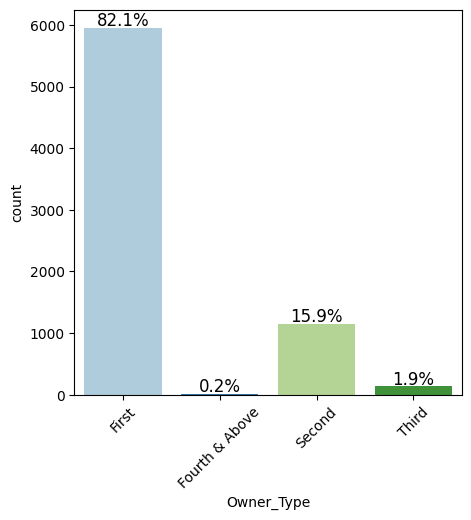

In [ ]:
labeled_barplot(df, 'Owner_Type', perc = True)

**Observation:**

* At 82.1% used vehicles are First owners

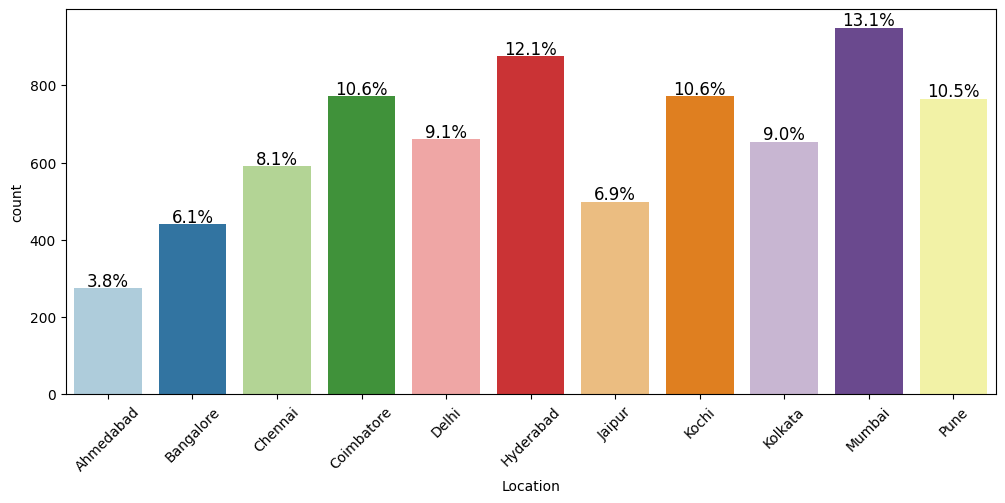

In [ ]:
labeled_barplot(df, 'Location', perc = True)

**Observation:**

* Ranging from 3.8% to 13.1% in Mumbai, there is a good distribution of sales throught these cities.
  * Mumbai, Hyderabad are the top and Coimbatore, Kochi, and Pune are third.

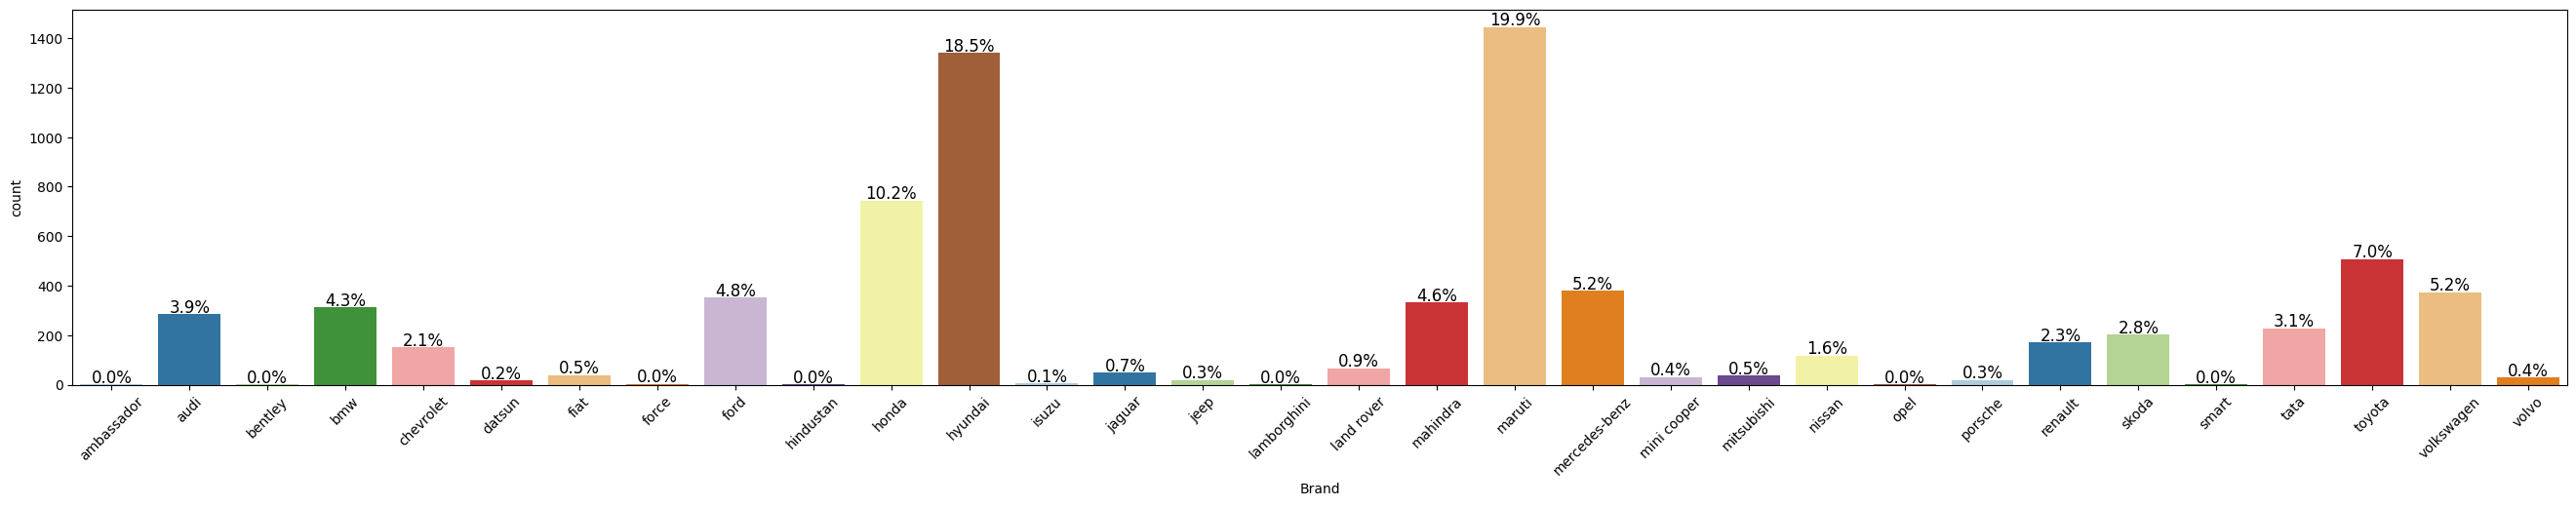

In [ ]:
labeled_barplot(df, 'Brand', perc = True)

**Observation:**

* This shows the sigificance Maruti 19.9% and Hyundai 18.5% used car sales, these are the dominant Brands of vehicle, with Honda third at 10.2%

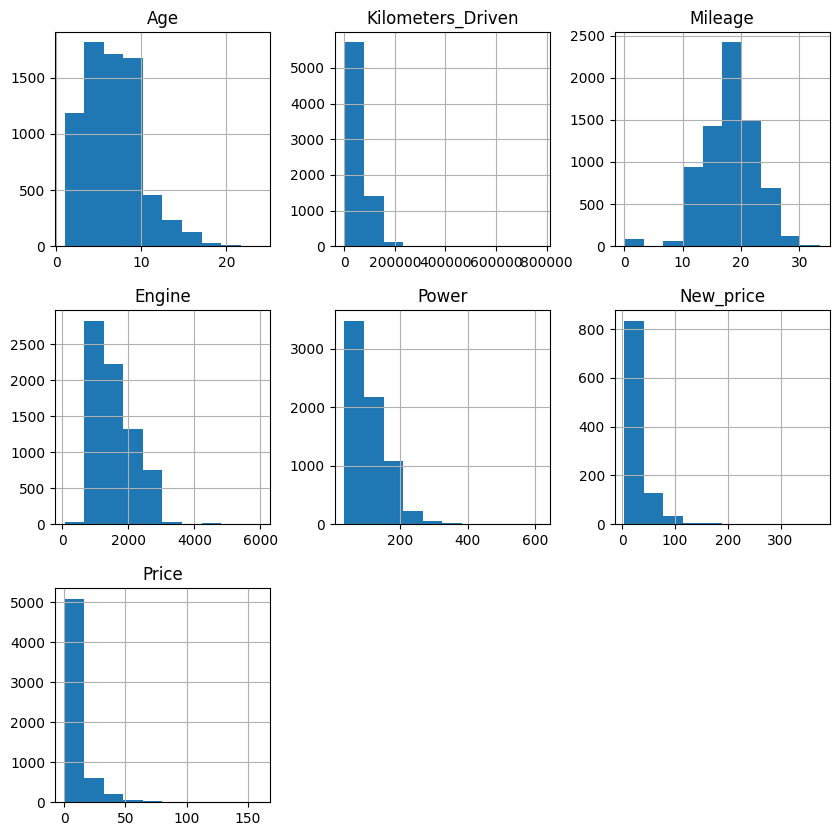

In [ ]:
# Overview of the data in histograms
num_cols = ['Age', 'Kilometers_Driven', 'Mileage','Engine', 'Power', 'New_price', 'Price']
df[num_cols].hist(figsize = (10, 10))

plt.show()

**Observation:**

* There are some heavily right skewed variables in this dataframe; Kilometers_Driven, Engine, Power, New_Price, and Price.  Age is also right skewed but not as drastically as the others.
  * The dependent variable Price will need a log transfer and possibly others, we will adress the others after looking at outliers.
  * New_Price will need to be dropped.

### **(QUESTION 2b)**

In [ ]:
# Defining boxplot histogram funciton
def histogram_boxplot(data, feature, figsize = (8, 4), kde = False, bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,
        sharex = True,
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,)

    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )
    sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = True, ax = ax_hist2
    )
    ax_hist2.axvline(data[feature].mean(), color = "green", linestyle = "--")
    ax_hist2.axvline(data[feature].median(), color = "black", linestyle = "-")

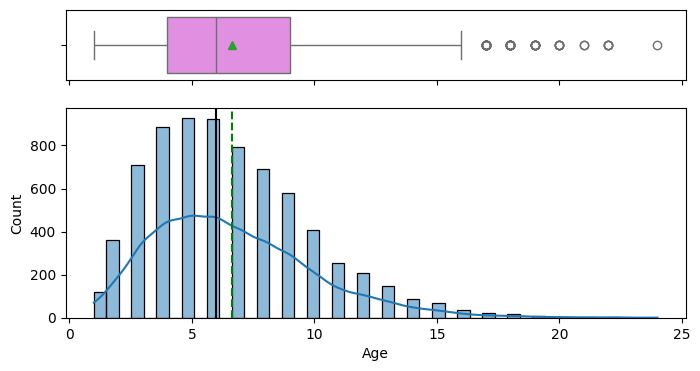

In [ ]:
histogram_boxplot(df, 'Age', kde = True)

**Observation:**

* Age is right skewed, but doesn't feel overly impacted by outliers, and depending on the owners could easily be accurate vehicle ages.

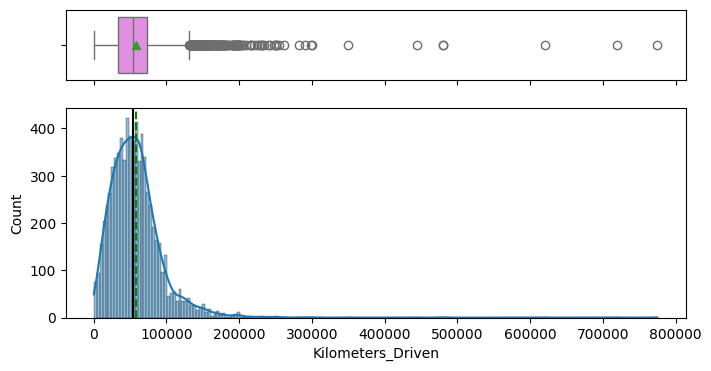

In [ ]:
histogram_boxplot(df, 'Kilometers_Driven', kde = True)

**Observation:**

* Kilometers_Driven even after removing the obvious incorrect value of 6,500,000, it still apears to have some highly suspicious values.  Values about 400,000 should be confirmed by age.
* There is an obvious right skew.

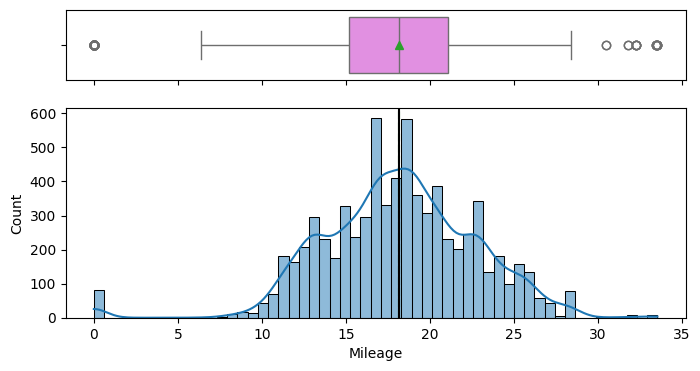

In [ ]:
histogram_boxplot(df, 'Mileage', kde = True)

**Observation:**

* Mileage is the most normally distributed of the numerical values.
* No extensive outliers, but the zero values will need to be imputed as no mileage is ever reported as zero.

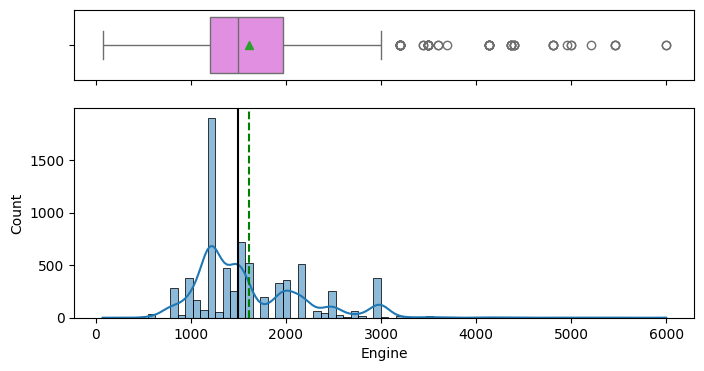

In [ ]:
histogram_boxplot(df, 'Engine', kde = True)

**Observation:**

* There is a clear standard engine size.  
* Right skewed, but with further inspection the Engine sizes that are greater than 5000 are all high powered vehicles.  The inputs are accurate.

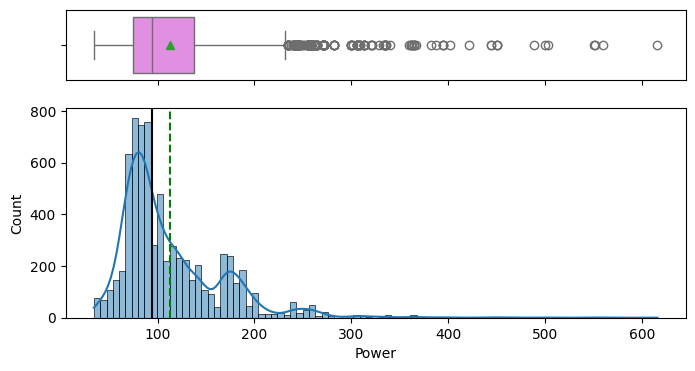

In [ ]:
histogram_boxplot(df, 'Power', kde = True)

**Observation:**

* Again there is a clear standard power range.
* And again, right skewed, but with further inspection the Power values that are greater than 500 are all high powered vehicles, and the same vehicles as the Engine size.  The inputs are accurate.

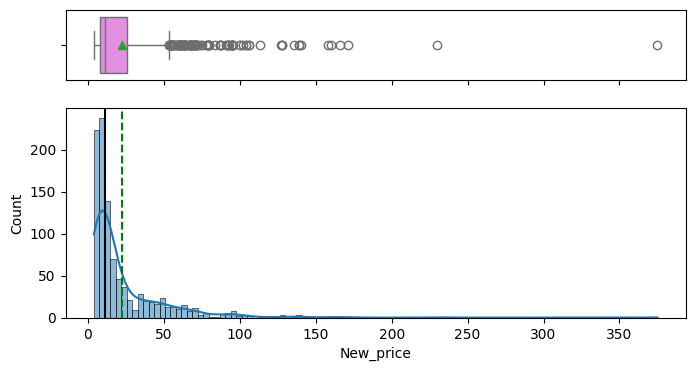

In [ ]:
histogram_boxplot(df, 'New_price', kde = True)

**Observation:**

* New_price will need to be dropped to the 86.1% missing values.  
* There is a right skew, and the one large values at 375 is the Bentley that tops the Engine and Power ranges as well.  

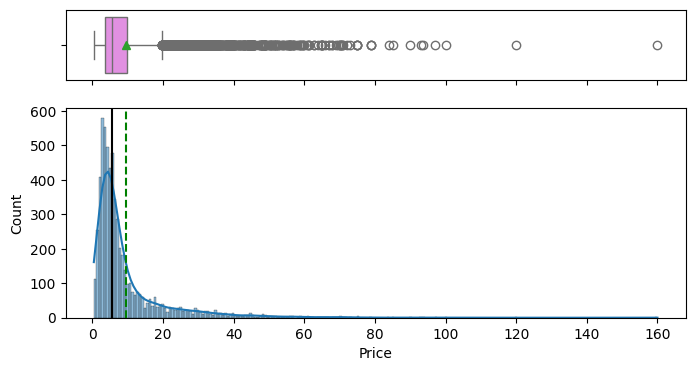

In [ ]:
histogram_boxplot(df, 'Price', kde = True)

In [ ]:
# Performing a log transformation to address the right skew of the dependent variable
df['log_Price'] = np.log(df['Price'])

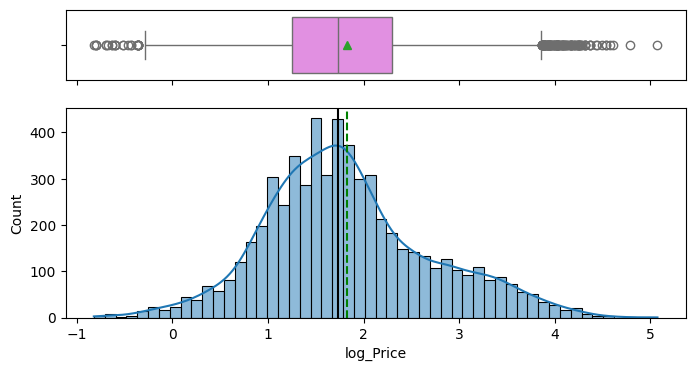

In [ ]:
histogram_boxplot(df, 'log_Price', kde = True)

**Observation: (QUESTION 3b & 4b)
* Price is the dependent variable.
* Before log, you can see two outliers that are affecting the skew.
* Taking the log of Price has completely transformed the variable into a fairly normal distribution, reducing the affect of the minimal extreme outliers.
  * I will keep the non-log Price until modeling to confirm it's relevance.

## **Bivariate Analysis**

**Questions:**

* 1c. Plot a scatter plot for the log transformed values(if log_transformation done in previous steps)? **(below)**
* 2c. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables? **(below)**
* 3c. Plot a box plot for target variable and categorical variable 'Location' and write your observations? **(below)**

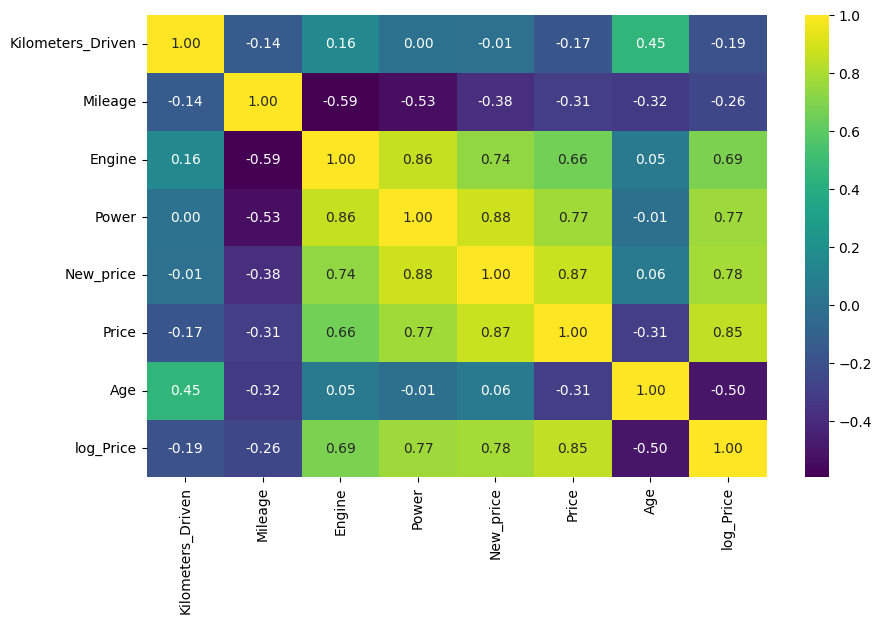

In [ ]:
# Checking the heatmap of the numerical variables
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis')
plt.show()

**Observation:** (QUESTION 2c)

* Price and log_Price have the strongest correlation, in order from 0.85 to 0.69, with New_price, Power, and Engine.  
  * And negative -0.50 to -0.19 with Age, Mileage, and Kilometers_Driven.
* Kilometers_Driven highest correlation is with Age, which is logical.
* Mileage is understandably negatively correlated with the Engine and Power related variables, but is also across the board negatively correlated with all variables.
* Engine and Power are correlated with eachother, as they go hand in hand.
* And Age is negatively correlated with Mileage which is also logical because the increased fuel efficancy came about in more recent years.

### **(QUESTION 1c)**

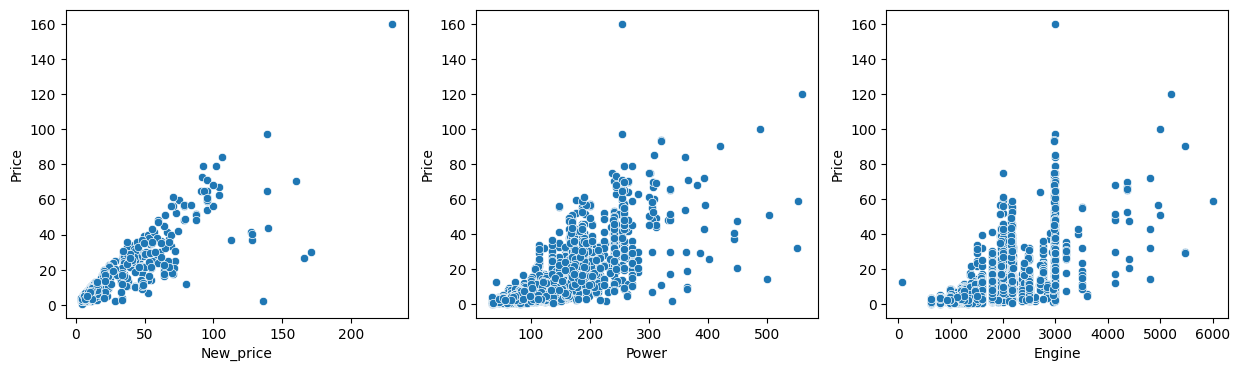

In [ ]:
# Checking the independent and dependent variable correlations
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(x = 'New_price', y = 'Price', data = df, ax = axes[0]);
sns.scatterplot(x = 'Power', y = 'Price', data = df, ax = axes[1]);
sns.scatterplot(x = 'Engine', y = 'Price', data = df, ax = axes[2]);

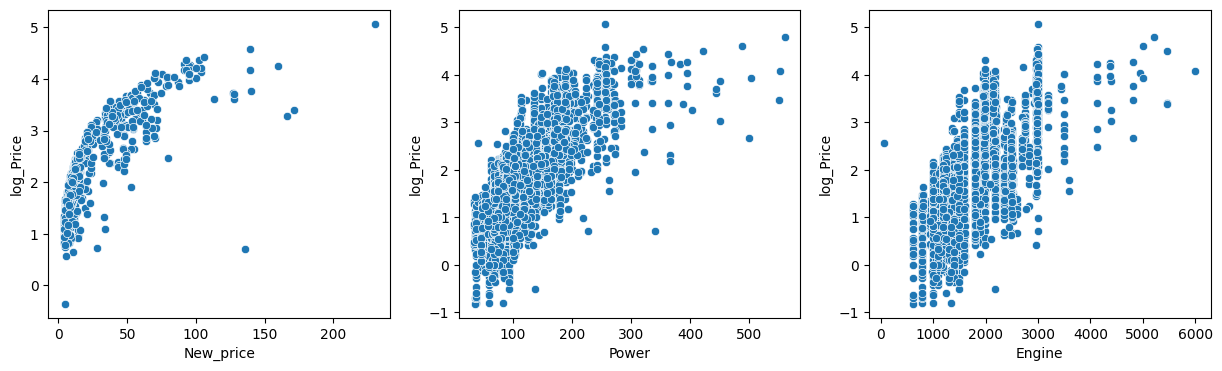

In [ ]:
# Checking the independent and LOGGED dependent variable correlations
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(x = 'New_price', y = 'log_Price', data = df, ax = axes[0]);
sns.scatterplot(x = 'Power', y = 'log_Price', data = df, ax = axes[1]);
sns.scatterplot(x = 'Engine', y = 'log_Price', data = df, ax = axes[2]);

**Observation:**

* Again, the lack of values in New_price is shown here.
* Power and Engine have a cluster to a point, and then beyond that you can see the pricing becoming more variable, it's likely due to high end cars which don't follow the standard pricing rules usually.
* Log_Price will really help with the nature of this data and that is evident.

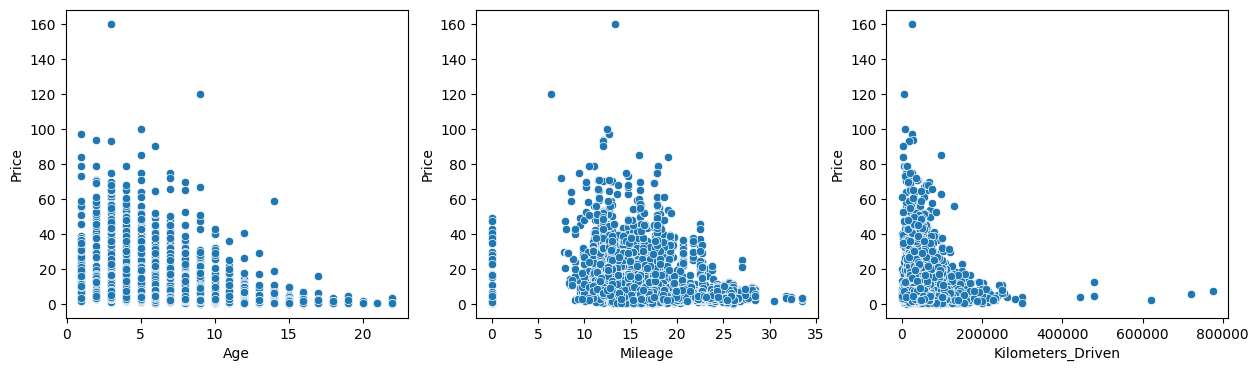

In [ ]:
# Checking the independent and dependent variable correlations
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(x = 'Age', y = 'Price', data = df, ax = axes[0]);
sns.scatterplot(x = 'Mileage', y = 'Price', data = df, ax = axes[1]);
sns.scatterplot(x = 'Kilometers_Driven', y = 'Price', data = df, ax = axes[2]);

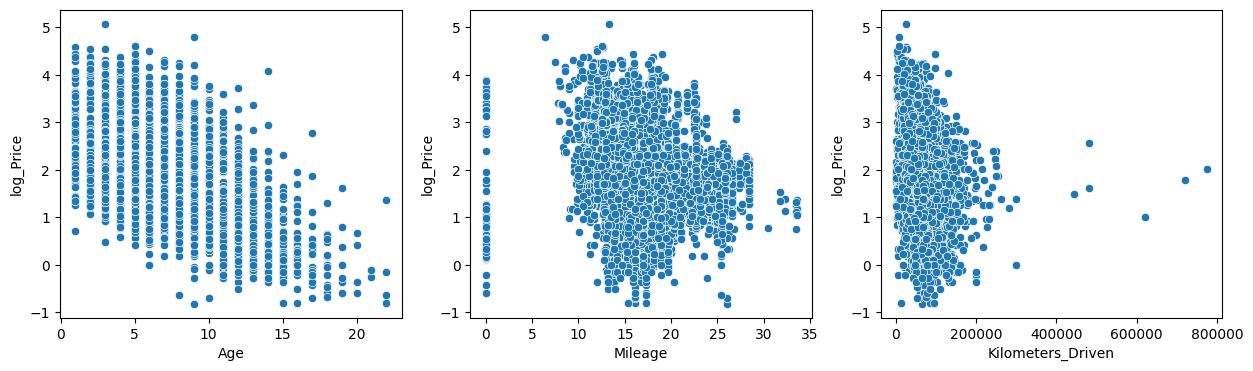

In [ ]:
# Checking the independent and LOGGED dependent variable correlations
fig, axes = plt.subplots(1, 3, figsize = (15, 4))
sns.scatterplot(x = 'Age', y = 'log_Price', data = df, ax = axes[0]);
sns.scatterplot(x = 'Mileage', y = 'log_Price', data = df, ax = axes[1]);
sns.scatterplot(x = 'Kilometers_Driven', y = 'log_Price', data = df, ax = axes[2]);

**Observation:**

* Age has a logical relationship with Price, cars depreciate and that's the curve shown.
* Mileage has values at 0.0 that need to be addressed. With a general range of Mileage possible it lacks an obvious visual correlation with Price.
* Kilometers_Driven has an expected relationship with Price, but the outliers/potential wrong values need to be addressed.

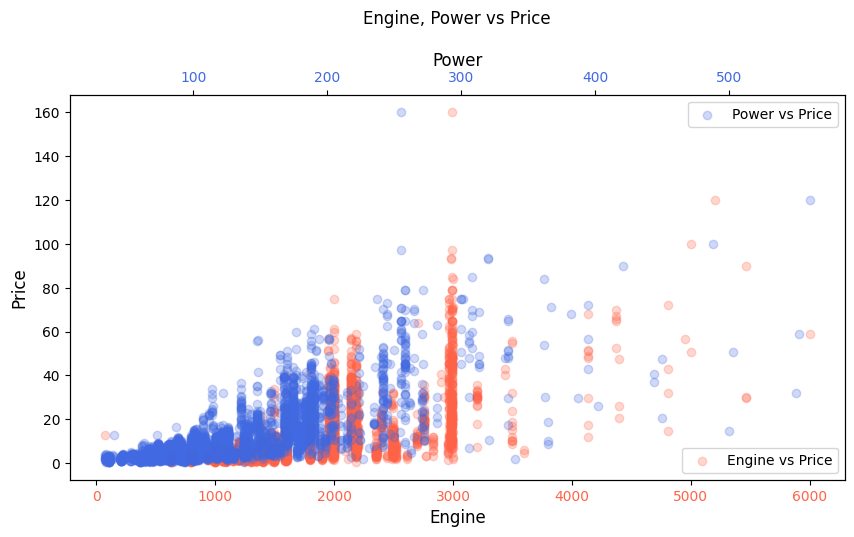

In [ ]:
# Checking multiple independent variable correlations
fig, ax1 = plt.subplots(figsize=(10, 5))

scatter1 = ax1.scatter(df['Engine'], df['Price'], color='tomato', alpha=0.25, label='Engine vs Price')
ax1.set_xlabel('Engine', fontsize=12)
ax1.set_ylabel('Price', fontsize=12)
ax1.tick_params(axis='x', labelcolor='tomato')

ax2 = ax1.twiny()
scatter2 = ax2.scatter(df['Power'], df['Price'], color='royalblue', alpha=0.25, label='Power vs Price')
ax2.set_xlabel('Power', fontsize=12)
ax2.tick_params(axis='x', labelcolor='royalblue')

ax1.legend(handles=[scatter1], loc='lower right')
ax2.legend(handles=[scatter2], loc='upper right')
plt.title('Engine, Power vs Price', pad=20)
plt.show()

**Observation:**

* Price vs Engine and Power have a strong relationship, increased power/engine size yields a higher price.

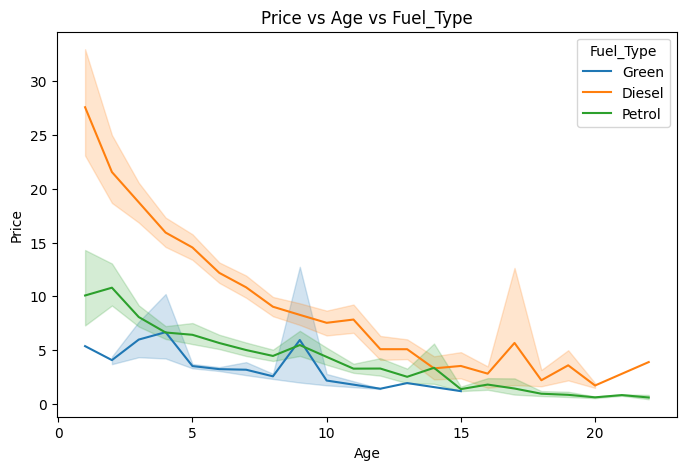

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Price vs Age vs Fuel_Type")
sns.lineplot(x='Age', y='Price',hue='Fuel_Type',
             data=df)
plt.show()

**Observation:**

* Younger vehicles yields higher prices.
* Diesel vehicles have higher prices than Petrol.
* Green fuel are the lowest prices.

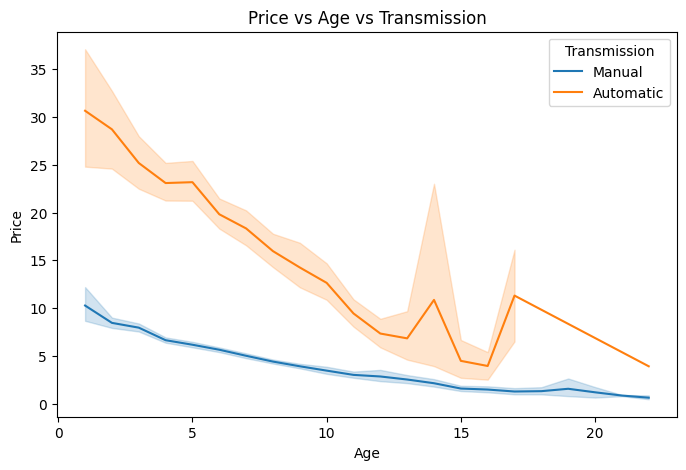

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Price vs Age vs Transmission")
sns.lineplot(x='Age', y='Price',hue='Transmission',
             data=df)
plt.show()

**Observation:**

* Automatic vehicles have higher prices than Manual Transmissions

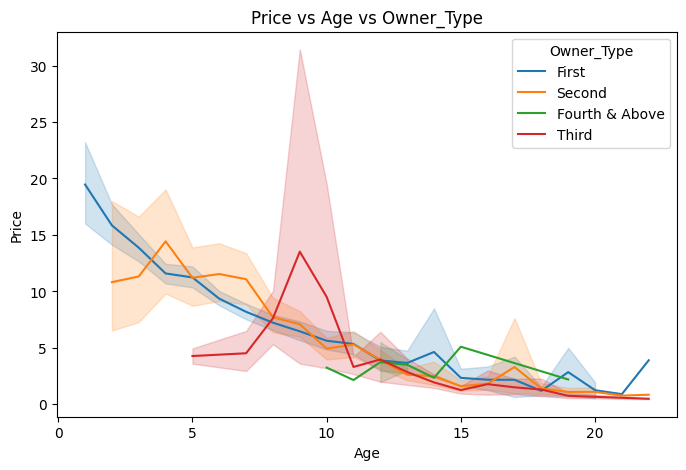

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Price vs Age vs Owner_Type")
sns.lineplot(x='Age', y='Price',hue='Owner_Type',
             data=df)
plt.show()

**Observation:**

* Owner_type follows the depreciation in Price by Age.

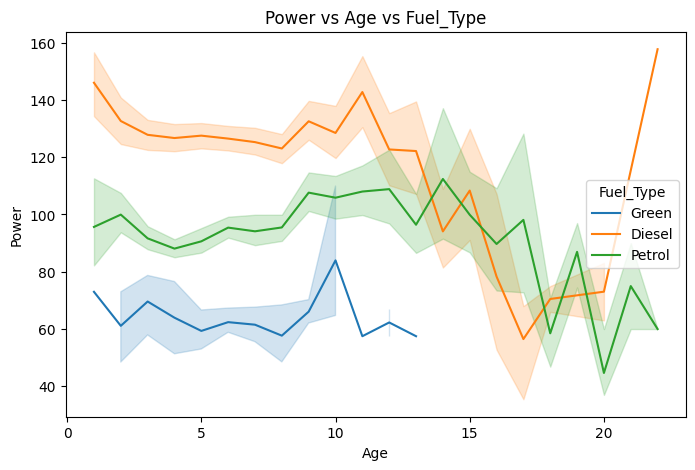

In [ ]:
plt.figure(figsize=(8,5))
plt.title("Power vs Age vs Fuel_Type")
sns.lineplot(x='Age', y='Power',hue='Fuel_Type',
             data=df)
plt.show()

**Observation:**

* Diesel have higher Power, all power Fuel_Types depreciate significantly after 10 years.
* Green vehicles, lowest Power, have no representation above 15 years, either they didn't exist or thet don't last that long.

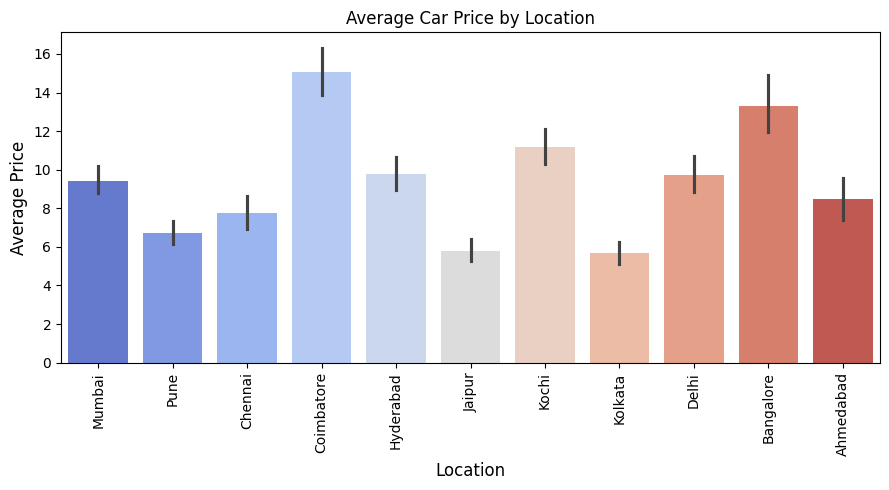

In [ ]:
plt.figure(figsize=(9, 5))
barplot = sns.barplot(x='Location', y='Price', data=df, palette='coolwarm')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Car Price by Location', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:** (QUESTION 3c)

* The highest average Prices are in Coimbatore and Bangalore.
* The lowest average Prices are in Jaipur and Kolkata.

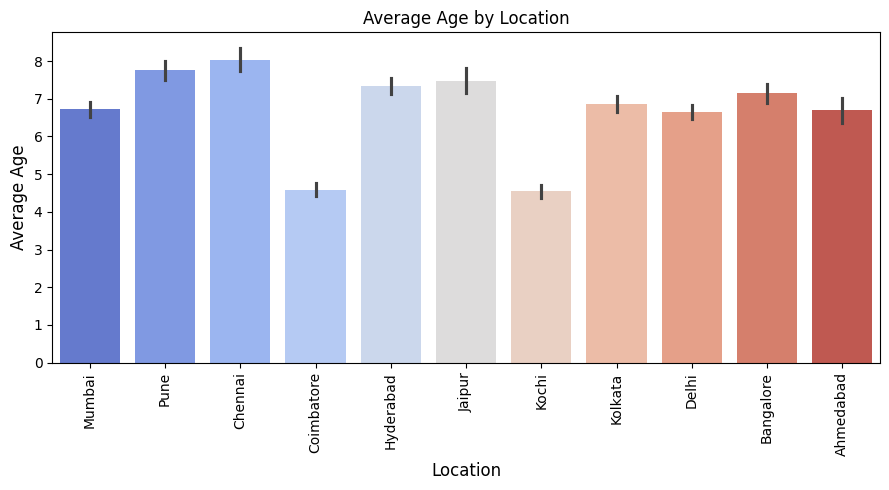

In [ ]:
plt.figure(figsize=(9, 5))
barplot = sns.barplot(x = 'Location', y ='Age', data = df, palette='coolwarm')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Age', fontsize=12)
plt.title('Average Age by Location', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:**

* Oldest average vehicle Age by locaiton is Pune and Chennai.
* Newest average vehicle Age by location is Coimbatore and Kochi.

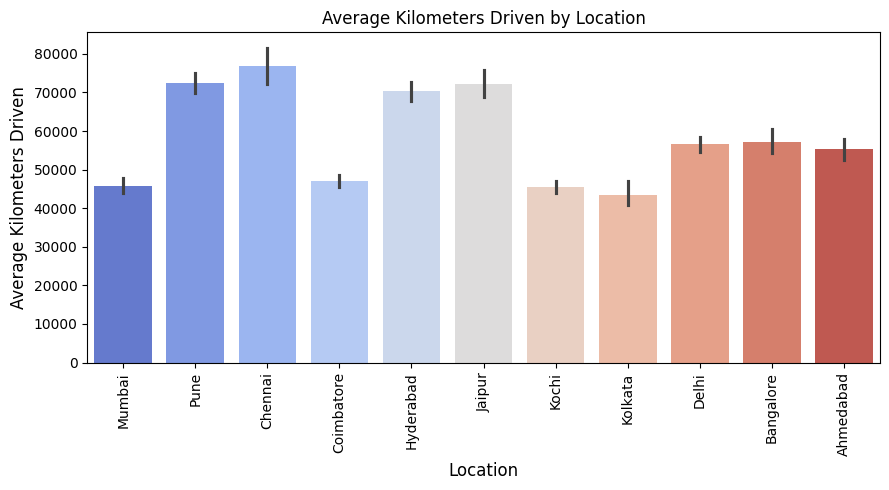

In [ ]:
plt.figure(figsize=(9, 5))
barplot = sns.barplot(x='Location', y='Kilometers_Driven', data=df, palette='coolwarm')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.xlabel('Location', fontsize=12)
plt.ylabel('Average Kilometers Driven', fontsize=12)
plt.title('Average Kilometers Driven by Location', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:**

* Highest average Kilometers_Driven by Location is Chennai and Pune.
* Lowest average Kilometers_Driven by Location is Kolkata, Kochi, Coimbatore, and Mumbai.

**Insight:** The lowest average prices with lowest age and kilometers driven, is the Kolkata location.

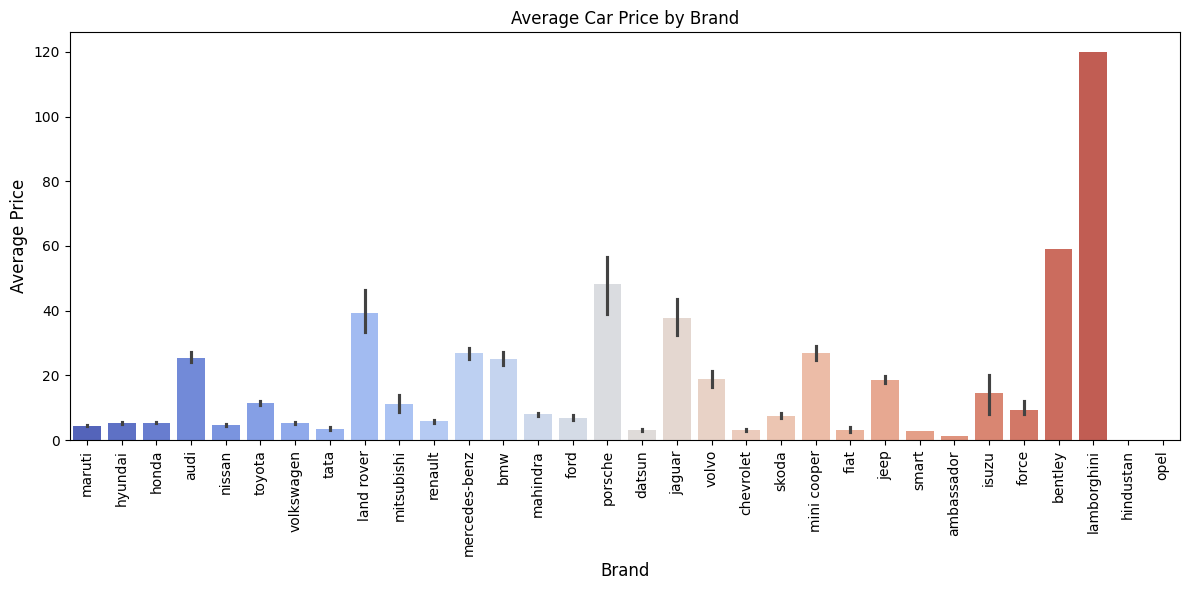

In [ ]:
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x='Brand', y='Price', data=df, palette='coolwarm')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.title('Average Car Price by Brand', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:**

* The top average Prices of vehciles are Lamborghini and Bentley, followed by Porshce, then Land Rover and Jaguar, next Audi, Mercedes-Benz, BMW, Mini Cooper.
* The lowest are Opel, Hindustan, and Ambassador.

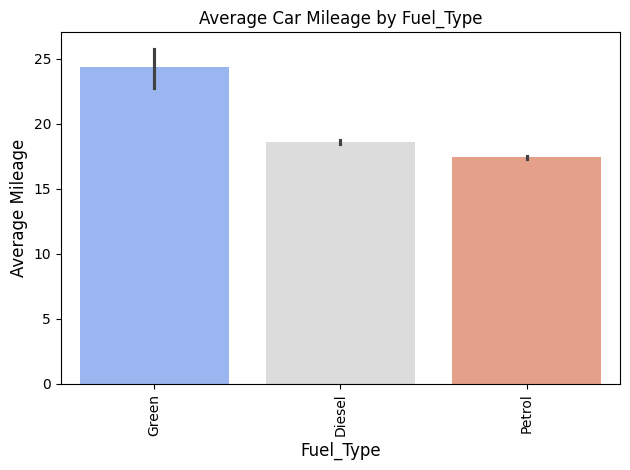

In [ ]:
barplot = sns.barplot(x='Fuel_Type', y='Mileage', data=df, palette='coolwarm')
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, horizontalalignment='center')

plt.xlabel('Fuel_Type', fontsize=12)
plt.ylabel('Average Mileage', fontsize=12)
plt.title('Average Car Mileage by Fuel_Type', fontsize=12)
plt.tight_layout()
plt.show()

**Observation:**

* Petrol has the lowest average Mileage reported.

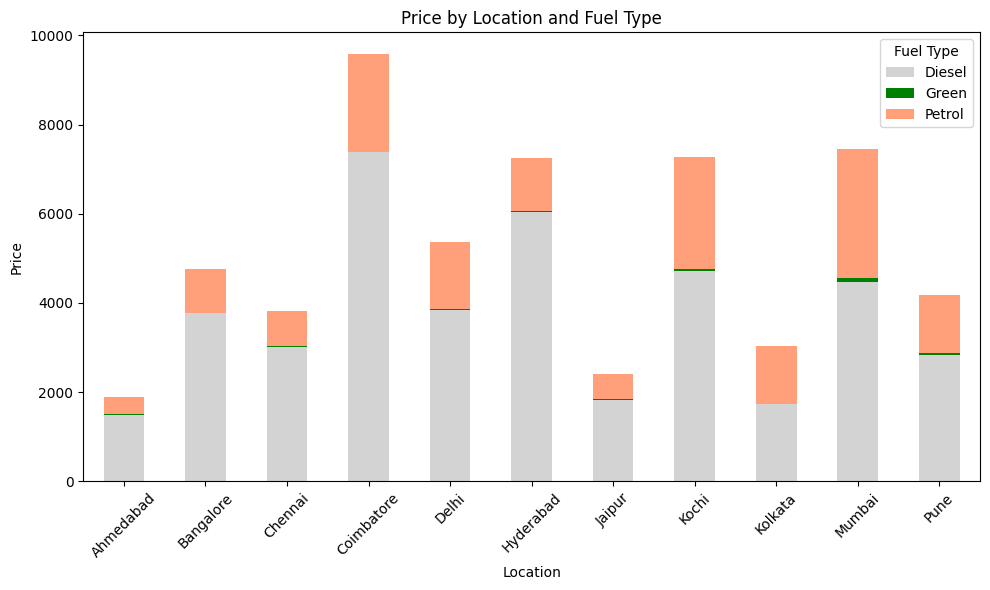

In [ ]:
agg_df = df.groupby(['Location', 'Fuel_Type'])['Price'].sum().unstack(fill_value=0)
colors =['lightgrey', 'green','lightsalmon']
agg_df.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

plt.title('Price by Location and Fuel Type')
plt.xlabel('Location')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Observation:**

* This shows the sum of the Prices of vehcles and the distribution of Fuel_Type.
* Coimbatore has the highest amount of sales by Price, followed by Mumbai, Kochi, and Hyperabad.

**Insight**

* Kolkata has low total Price sum with medium high counts with a low average Price.

### **Outlier Detection and Treatment**

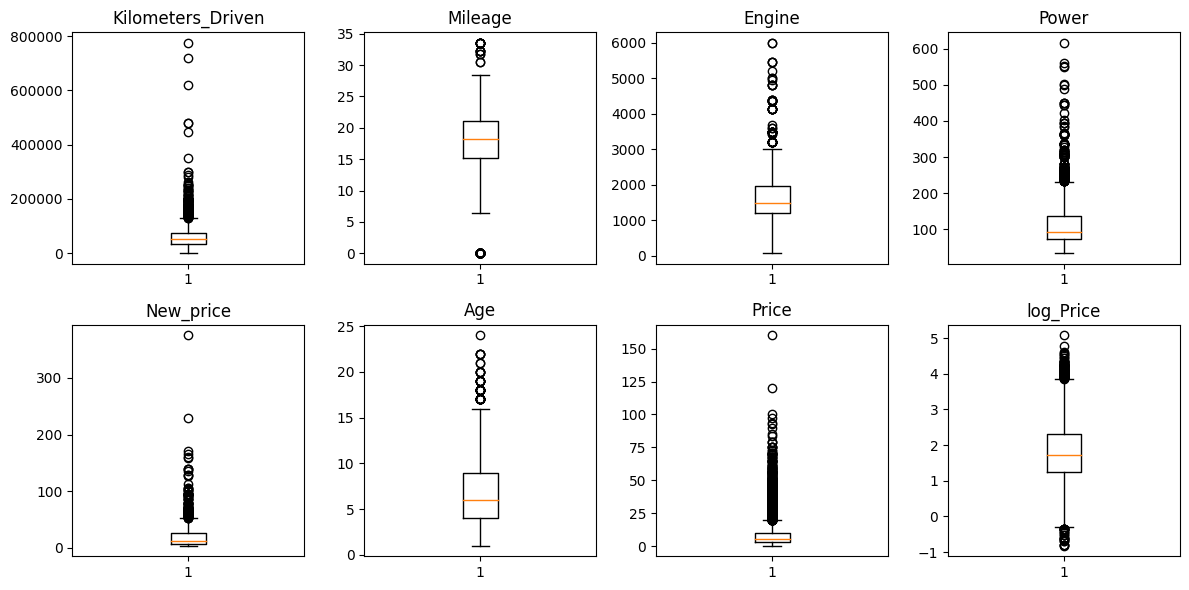

In [ ]:
# Outlier detection using boxplot
num_columns = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'New_price', 'Age', 'Price', 'log_Price']
plt.figure(figsize=(12, 6))

for i, variable in enumerate(num_columns):
    plt.subplot(2, 4, i + 1)
    valid_data = df[variable].dropna()
    plt.boxplot(valid_data, whis=1.5)
    plt.title(variable)

plt.tight_layout()
plt.show()

In [ ]:
# Checking the percentage of outliers independent variables
for k, v in df.select_dtypes(include=[np.number]).items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

Column Kilometers_Driven outliers = 3.54%
Column Mileage outliers = 1.36%
Column Engine outliers = 0.90%
Column Power outliers = 3.76%
Column New_price outliers = 1.49%
Column Price outliers = 9.90%
Column Age outliers = 0.80%
Column log_Price outliers = 1.86%


**Observation: (QUESTION 3b)**

* Kilometers_Driven has additional servere outliers, it's difficult to be sure they are incorrectly input as before, so imputing values isn't appropriate, these are vehicles that maybe had a level of maintence that warrented this longevity, or it was in fact incorrectly recorded.
  * Even after removing the extreme values, the distribution will still have a strong right skew that will benefit from taking the log of this variable.
* Engine and Power are representative of high power vehicles and these will remain.
* New_price will be dropped therefore doesn't need to be addressed.
* Price has some outliers, but these were reduced by taking the log of Price.

In [ ]:
# Locating extreme Kilometers_Driven rows
df[df['Kilometers_Driven'] > 400000]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price
340,Kolkata,775000,Diesel,Automatic,First,19.30,1968.0,141.00,5,NaN,7.50,7,skoda,octavia,ambition plus 2.0 tdi at,2.014903
358,Chennai,620000,Petrol,Manual,First,20.36,1197.0,78.90,5,NaN,2.70,11,hyundai,i10,magna 1.2,0.993252
1860,Chennai,720000,Diesel,Manual,First,20.54,1598.0,103.60,5,NaN,5.90,7,volkswagen,vento,diesel highline,1.774952
2823,Chennai,480000,Diesel,Automatic,First,16.96,1968.0,138.03,5,NaN,13.00,5,volkswagen,jetta,2013-2015 2.0l tdi highline at,2.564949
3092,Kolkata,480000,Petrol,Manual,First,17.40,1497.0,117.30,5,NaN,5.00,5,honda,city,i vtec sv,1.609438
4491,Bangalore,445000,Petrol,Manual,First,18.50,1197.0,82.90,5,NaN,4.45,7,hyundai,i20,magna optional 1.2,1.492904


In [ ]:
# Dropping vehicles that have above 445,000 miles and above
df = df.drop([340, 358, 1860, 2823, 3092, 4491], axis = 0).reset_index(drop = True)

In [ ]:
# Performing a log transformation to address the right skew and outliers in Kilometers_Driven
df['log_Kilometers_Driven'] = np.log(df['Kilometers_Driven'])

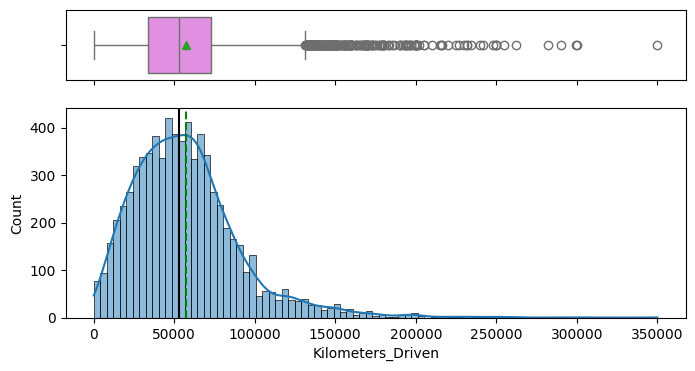

In [ ]:
histogram_boxplot(df, 'Kilometers_Driven', kde = True)

**Observation: QUESTION 4b)**

* While Kilometers_Driven is still right skewed the log made the distribution  more normal.

### **Missing value treatment**

In [ ]:
# Checking null values
df.isnull().sum()

Location                    0
Kilometers_Driven           0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                     2
Engine                     46
Power                     175
Seats                      53
New_price                6241
Price                    1234
Age                         0
Brand                       0
Model                       0
Series                      0
log_Price                1234
log_Kilometers_Driven       0
dtype: int64

In [ ]:
# Locating missing Mileage value and Milegae that has a zero value
df[df['Mileage'].isna()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
4441,Chennai,50000,Green,Automatic,First,NaN,72.0,41.0,5,13.58,13.00,4,mahindra,e,verito d4,2.564949,10.819778
4898,Mumbai,44000,Green,Automatic,First,NaN,1798.0,73.0,5,NaN,12.75,9,toyota,prius,2009-2016 z4,2.545531,10.691945


In [ ]:
# Replacing mean Green Fuel_Type for missing values
mean_green = df[df['Fuel_Type'] == 'Green']['Mileage'].mean()
df['Mileage'] = df['Mileage'].fillna(mean_green)

In [ ]:
# Checking the zero values
df[df['Mileage'] == 0.0].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
14,Pune,85000,Diesel,Automatic,Second,0.0,2179.0,115.0,5,NaN,17.50,8,land rover,freelander,2 td4 se,2.862201,11.350407
67,Coimbatore,15369,Diesel,Automatic,First,0.0,1950.0,194.0,5,49.14,35.67,1,mercedes-benz,c-class,progressive c 220d,3.574310,9.640108
79,Hyderabad,87591,Petrol,Manual,First,0.0,1086.0,NaN,5,NaN,1.30,15,hyundai,santro,xing xl,0.262364,11.380434
194,Ahmedabad,60006,Petrol,Manual,First,0.0,NaN,NaN,NaN,NaN,2.95,13,honda,city,1.5 gxi,1.081805,11.002200
229,Bangalore,70436,Diesel,Manual,First,0.0,1498.0,99.0,NaN,NaN,3.60,5,ford,figo,diesel,1.280934,11.162460


In [ ]:
# Changing to NaN then imputing with mean value by Brand Fuel_Type mean
df.loc[df['Mileage']==0.0,'Mileage']=np.nan
df['Mileage'] = df.groupby(['Brand', 'Fuel_Type'])['Mileage'].transform(lambda val: val.fillna(val.mean()))

In [ ]:
# Imputing the remaining two mising values by Fuel_Type mean
df['Mileage'] = df.groupby(['Fuel_Type'])['Mileage'].transform(lambda val: val.fillna(val.mean()))

**Observation:**

* As mentioned during the summary, the 0.0 min values for Mileage needed to be addressed along with the 2 missing values for a total of 83 values.
  * The two missing values had no other like entries, they are the only two Electiric cars in the dataframe, the mean value of the Green Fuel_Types was imputed.
  * The 0.0 values were spread throughout the various Brands and either Diesel or Petrol, the mean Mileage for each Brand and Fuel_Type was imputed.

In [ ]:
# Locating the missing values in Engine
df[df['Engine'].isna()].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
194,Ahmedabad,60006,Petrol,Manual,First,16.585121,NaN,NaN,NaN,NaN,2.95,13,honda,city,1.5 gxi,1.081805,11.002200
208,Kolkata,42001,Petrol,Manual,First,16.100000,NaN,NaN,NaN,NaN,2.11,10,maruti,swift,1.3 vxi,0.746688,10.645449
731,Chennai,97800,Petrol,Manual,Third,16.100000,NaN,NaN,NaN,NaN,1.75,14,maruti,swift,1.3 vxi,0.559616,11.490680
747,Mumbai,55001,Diesel,Automatic,Second,12.831053,NaN,NaN,NaN,NaN,26.50,12,land rover,range rover,3.0 d,3.277145,10.915107
1292,Delhi,55005,Petrol,Manual,First,12.800000,NaN,NaN,NaN,NaN,3.20,11,honda,city,1.3 dx,1.163151,10.915179


In [ ]:
# Imputing the missing Engine values with Brand median
df['Engine'] = df.groupby(['Brand'])['Engine'].apply(lambda val:val.fillna(val.median()))

In [ ]:
# Locating the missing values in Power
df[df['Power'].isna()].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
76,Jaipur,111111,Diesel,Manual,First,17.800000,1399.0,NaN,5,NaN,2.00,12,ford,fiesta,1.4 sxi tdci,0.693147,11.618285
79,Hyderabad,87591,Petrol,Manual,First,18.308633,1086.0,NaN,5,NaN,1.30,15,hyundai,santro,xing xl,0.262364,11.380434
89,Hyderabad,73745,Petrol,Manual,First,17.000000,1086.0,NaN,5,NaN,2.10,13,hyundai,santro,xing xo,0.741937,11.208368
120,Mumbai,102000,Petrol,Manual,Second,17.000000,1086.0,NaN,5,NaN,0.85,15,hyundai,santro,xing xl erlx euro iii,-0.162519,11.532728
143,Kochi,80759,Petrol,Manual,Third,17.000000,1086.0,NaN,5,NaN,1.67,12,hyundai,santro,xing xo erlx euro ii,0.512824,11.299225


In [ ]:
# Imputing the missing Power values with Brand median
df['Power'] = df.groupby(['Brand'])['Power'].apply(lambda val:val.fillna(val.median()))

In [ ]:
# Addressing a remaining NaN value due to no median by Brand available
df[df['Power'].isna()]

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
913,Pune,103000,Diesel,Automatic,Second,18.752758,799.0,NaN,2-4,NaN,3.0,12,smart,fortwo,cdi at,1.098612,11.542484
6210,Pune,65000,Diesel,Manual,Second,14.100000,1995.0,NaN,5,NaN,NaN,24,hindustan,motors,contessa 2.0 dsl,NaN,11.082143


In [ ]:
# Imputing median value for remaining missing Power
df.loc[df['Power'].isnull(), 'Power'] = df['Power'].median()

**Observation:**

* Engine and Power's missing values were imputed with the median value of the Brand.  There was a variety of Brands that were missing data, and with the overall right skewed data of Engine and Power, the median was the appropriate method to use.
  * Two missing values of Power remained due to lack of median by Brand, and in those cases the overal median for Power was imputed.

In [ ]:
# Locating the missing values in Seats
df[df['Seats'].isna()].head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price,Age,Brand,Model,Series,log_Price,log_Kilometers_Driven
194,Ahmedabad,60006,Petrol,Manual,First,16.585121,1497.0,98.6,NaN,NaN,2.95,13,honda,city,1.5 gxi,1.081805,11.002200
208,Kolkata,42001,Petrol,Manual,First,16.100000,1197.0,74.0,NaN,NaN,2.11,10,maruti,swift,1.3 vxi,0.746688,10.645449
229,Bangalore,70436,Diesel,Manual,First,19.541013,1498.0,99.0,NaN,NaN,3.60,5,ford,figo,diesel,1.280934,11.162460
731,Chennai,97800,Petrol,Manual,Third,16.100000,1197.0,74.0,NaN,NaN,1.75,14,maruti,swift,1.3 vxi,0.559616,11.490680
747,Mumbai,55001,Diesel,Automatic,Second,12.831053,2179.0,187.7,NaN,NaN,26.50,12,land rover,range rover,3.0 d,3.277145,10.915107


In [ ]:
# Determining the mode value of seats by Brand and imputing to missing Seat values
def get_mode(series):
    if not series.mode().empty:
        return series.mode().iloc[0]
    else:
        return None

df['Seats'] = df.groupby('Brand')['Seats'].transform(lambda x: x.fillna(get_mode(x)))

In [ ]:
# Changing seats back to object
df['Seats'] = df['Seats'].astype('object')

**Observation:**

* The mode of seats by Brand was determined and then imputed to the missing values.

In [ ]:
# Dropping New_price due to the high percentage of missing values
df.drop(columns = ['New_price'], axis = 1, inplace = True)

**Observation:**

* New_Price with 86% of the data missing and the numerous seemingly more relevant more features that contribute to a used car price, it seems appropriate to drop this column.

In [ ]:
# Seperating the missing value rows of the dependent variable Price and log_Price
nan_price_df = df[df['Price'].isna()]
nan_log_price_df = df[df['log_Price'].isna()]

df = df.dropna(subset=['Price','log_Price'])

In [ ]:
# Dropping Price for modeling
df = df.drop(columns=['Price'], axis = 1)

**Observation:**

* There are 1234 missing values for the dependent variable Price, these values can not be imputed and therefore will be dropped, from log_Price as well.
  * The rows with the missing dependent variable were retained for possible additonal use.
* As the log_Price has shown to be beneficial, at this time we will also drop Price as well.

In [ ]:
# Confirming no null values remain
df.isnull().sum()

Location                 0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Age                      0
Brand                    0
Model                    0
Series                   0
log_Price                0
log_Kilometers_Driven    0
dtype: int64

## **Important Insights from EDA and Data Preprocessing**

What are the the most important observations and insights from the data based on the EDA and Data Preprocessing performed?

  * Answer:
    * From preprocessing it was apparent the data needed to be cleaned up an average amount. This included imputing missing values, seperating Brand and Model names, dropping columns with low value, removing outliers, taking the log of heavily skewed variables, and removing duplicates.  
    * Many insights about the data were found during exploratory data analysis.
      * Engine and Power are highly correlated.
      * Diesel has the highest Power of the Fuel_Types
      * Increased Age, Mileage, and Kilometers_Driven decrease the Price.
      * Manual Transmissions are lower in Price.
      * Coimbatore has the high average Prices and sum of total Prices of all Locations.
      * Kolkata has the lowest average Price, Age, Kilometers_Driven, and sum of total Prices.

Question:

Why we should drop 'Name', 'Price', 'price_log', 'Kilometers_Driven' from X before splitting?

* Answer: These columns will not be needed in the X_train data.
  * Name as too many unique values, the Brand was serpated from this and will be utilized during modeling.
  * Price won't be used during modeling, it was decided due to the skew that the log of Price would be taken.
  * log_Price is dropped as it is the dependent variable.
  * Kilometers_Driven was dropped because due to the skew the log was taken and will be used during modeling.


### **Final Feature Feature Engineering and Preparing the data for Modeling**

In [ ]:
df.drop(columns = ['Kilometers_Driven', 'Series', 'Model'], axis = 1, inplace = True)

**Observation:**

* Kilometers_Driven will be dropped and log_Kilometers_Driven will be used for the model.
* Series contains 1628 unique values and not useful for modeling purposes.
* I am reluctantly choosing to drop Model.  I made many attempts to utilize this information, but ultimately the application of the information for this model and project will be more effective at a less granular level.  Creating a senario where 268 levels of significace for the various Models found feels less useful.
  * While the dataset is not small, the distribution of Models puts many Models at 1 representative, if this dataset was much much larger, there would be more nuiance for the model to pick up on, and there would be more value in the retention of this column.

In [ ]:
# Checking for duplicates after dropping multiple columns
df.duplicated().sum()

2

In [ ]:
# Locating the duplicates
duplicates = df.duplicated(keep=False)
df[duplicates]


,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age,Brand,log_Price,log_Kilometers_Driven
940,Kolkata,Diesel,Manual,First,27.39,1248.0,74.0,5,4,maruti,1.871802,10.275051
2936,Kolkata,Diesel,Manual,First,27.39,1248.0,74.0,5,4,maruti,1.871802,10.275051
3618,Hyderabad,Petrol,Manual,First,19.70,796.0,46.3,5,13,maruti,0.559616,10.862742
4775,Hyderabad,Petrol,Manual,First,19.70,796.0,46.3,5,13,maruti,0.559616,10.862742


In [ ]:
# Determining if these are duplicate records
df2 = data.copy()
dup_row= [942, 2940, 3623, 4781]
df2.loc[dup_row]

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_price,Price
942,942,Maruti Baleno Alpha Diesel,Kolkata,2016,29000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,9.53,6.50
2940,2940,Maruti Baleno Alpha 1.3,Kolkata,2016,29000,Diesel,Manual,First,27.39,1248.0,74.0,5.0,NaN,6.50
3623,3623,Maruti Alto LXi,Hyderabad,2007,52195,Petrol,Manual,First,19.70,796.0,46.3,5.0,NaN,1.75
4781,4781,Maruti Alto LXI,Hyderabad,2007,52195,Petrol,Manual,First,19.70,796.0,46.3,5.0,NaN,1.75


In [ ]:
# Dropping duplicates
df.drop([942, 3623], inplace=True)

**Observation:**

* After dropping multiple columns two rows have become duplicates.  
* Pulling the original rows shows that these are actually duplicate records, the chance that all columns, except two, for each of the vehicles occurred twice seems highly unlikley.
  * The only differences were in the S.No. and the Name which is still the same, just slightly different. The issue appears to be a recording error, therefore the duplicates will be removed.

In [ ]:
# Seperating independent and dependent variables
X = df.drop(['log_Price'], axis = 1)
y = df['log_Price']

In [ ]:
#  Adding an intercept term to increase stability in the model
X = sm.add_constant(X)

In [ ]:
# Using One Hot Encoding on the categorical variables
X_ohe = pd.get_dummies(X,
               columns = X.select_dtypes(include = ['object']).columns.to_list(),
               drop_first = True,
)

In [ ]:
# Spliting the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.3, random_state = 0)

In [ ]:
# Preprocessing Multicollinearity check
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

,Features,VIF
0,const,4872.002497
1,Mileage,3.802270
2,Engine,10.657396
3,Power,9.337772
4,Age,2.226144
5,log_Kilometers_Driven,1.810244
6,Location_Bangalore,2.456696
7,Location_Chennai,2.874828
8,Location_Coimbatore,3.405368
9,Location_Delhi,3.158640


In [ ]:
# Dropping high multicollinearity
X_train.drop(columns = ['Engine'], axis = 0, inplace = True)
X_test.drop(columns = ['Engine'], axis = 0, inplace = True)

**Observation:**

* Engine's high correlation to Power previously shown explains the high multicollinearity value.

In [ ]:
# Checking the NaN value source
constant_columns = [col for col in X_train.columns if X_train[col].nunique() == 1]
print("Constant columns:", constant_columns)

Constant columns: ['const', 'Brand_bentley', 'Brand_lamborghini']


In [ ]:
# Dropping the Brands that became constant columns after OHE
X_train.drop(columns = ['Brand_bentley'], axis = 0, inplace = True)
X_test.drop(columns = ['Brand_bentley'], axis = 0, inplace = True)

X_train.drop(columns = ['Brand_lamborghini'], axis = 0, inplace = True)
X_test.drop(columns = ['Brand_lamborghini'], axis = 0, inplace = True)

**Observation:**

* The source of the NaN values in the VIF table was determined to be from the result of the OHE causing Bentley and Lamborghini to become a constant variable. After many alternative solutions were attempted, the only effective one was removing these columns.  

In [ ]:
# Preprocessing Multicollinearity check
VIF_df = pd.DataFrame()
VIF_df['Features'] = X_train.columns
VIF_df['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
VIF_df

,Features,VIF
0,const,4806.409917
1,Mileage,3.369814
2,Power,4.356284
3,Age,2.211574
4,log_Kilometers_Driven,1.810208
5,Location_Bangalore,2.456617
6,Location_Chennai,2.874690
7,Location_Coimbatore,3.404911
8,Location_Delhi,3.158475
9,Location_Hyderabad,3.709969


**Observation:**

* All values are <5, excluding OHE values.

In [ ]:
# OLS Regression Model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     1048.
Date:                Mon, 01 Apr 2024   Prob (F-statistic):               0.00
Time:                        15:31:00   Log-Likelihood:                 78.816
No. Observations:                4207   AIC:                            -57.63
Df Residuals:                    4157   BIC:                             259.6
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         3.2886      0.255     12.878      0.000       2.788       3.789
Mileage                      -0.0217      0.002    -13.295      0.000      -0.025      -0.019
Power                         0.0062      0.000     42.606      0.000       0.006       0.006
Age                          -0.1200      0.002    -71.529      0.000      -0.123      -0.117
log_Kilometers_Driven        -0.0618      0.007     -8.793      0.000      -0.076      -0.048
Location_Bangalore            0.1338      0.024      5.480      0.000       0.086       0.182
Location_Chennai              0.0092      0.023      0.397      0.692      -0.036       0.055
Location_Coimbatore           0.0784      0.022      3.503      0.000       0.035       0.122
Location_Delhi               -0.0712      0.022     -3.171      0.002      -0.115      -0.027
Location_Hyderabad            0.0869      0.022      3.998      0.000       0.044       0.130
Location_Jaipur              -0.0782      0.024     -3.271      0.001      -0.125      -0.031
Location_Kochi               -0.0561      0.022     -2.533      0.011      -0.100      -0.013
Location_Kolkata             -0.2540      0.023    -11.144      0.000      -0.299      -0.209
Location_Mumbai              -0.0591      0.022     -2.732      0.006      -0.101      -0.017
Location_Pune                -0.0585      0.022     -2.642      0.008      -0.102      -0.015
Fuel_Type_Green              -0.2654      0.035     -7.511      0.000      -0.335      -0.196
Fuel_Type_Petrol             -0.3310      0.011    -29.164      0.000      -0.353      -0.309
Transmission_Manual          -0.1254      0.012    -10.205      0.000      -0.150      -0.101
Owner_Type_Fourth & Above     0.1086      0.098      1.105      0.269      -0.084       0.301
Owner_Type_Second            -0.0652      0.011     -5.988      0.000      -0.087      -0.044
Owner_Type_Third             -0.1160      0.032     -3.658      0.000      -0.178      -0.054
Seats_5                       0.0389      0.031      1.239      0.215      -0.023       0.100
Seats_6-10                    0.1753      0.036      4.931      0.000       0.106       0.245
Brand_audi                    0.3967      0.243      1.633      0.102      -0.079       0.873
Brand_bmw                     0.3778      0.243      1.555      0.120      -0.099       0.854
Brand_chevrolet              -0.4869      0.243     -2.006      0.045      -0.963      -0.011
Brand_datsun                 -0.6050      0.255     -2.374      0.018      -1.105      -0.105
Brand_fiat                   -0.4729      0.248     -1.904      0.057      -0.960       0.014
Brand_force                  -0.0437      0.295     -0.148      0.882      -0.622       0.535
Brand_ford                   -0.2285      0.242     -0.944      0.345      

**Observation:**

* The R-squared for the model is 0.925, this is a strong model so far.
* The 0.924 Adj-R-squared show's the model is fitting well.
  * With both R-squared and the Adj-R-squared we have good indication of model that can explain variance in the Used Car Prices for up to 92%.
* While we have some OHE variables that are have a >0.05. p-value, not all values in each category are high, therefore they don't require to be dropped.
* The std err range is higher for the OHE Brand's with low representation, therefore understandable.

In [ ]:
# Defining model evalutaion using the log and the back transformed target variable with Duan's smearing estimator for the bias correction factor
def model_evaluation(model, X, y_log_test):
    y_log_hat = model.predict(X)

    log_scale_mse = mean_squared_error(y_log_test, y_log_hat)
    log_scale_rmse = np.sqrt(log_scale_mse)

    residuals = y_log_test - y_log_hat
    smearing_factor = np.exp(np.mean(residuals))

    y_hat_bias_corrected = np.exp(y_log_hat) * smearing_factor
    y_original = np.exp(y_log_test)

    rmse_bias_corrected = np.sqrt(mean_squared_error(y_original, y_hat_bias_corrected))
    mae = mean_absolute_error(y_original, y_hat_bias_corrected)
    mape = np.mean(np.abs((y_original - y_hat_bias_corrected) / y_original)) * 100

    r2_log_scale = r2_score(y_log_test, y_log_hat)
    n = len(y_log_test)
    k = X.shape[1]
    adj_r2_log_scale = 1 - (((1 - r2_log_scale) * (n - 1)) / (n - k - 1))

    return pd.DataFrame({
        'Log Scale RMSE': [log_scale_rmse],
        'Bias Corrected RMSE': [rmse_bias_corrected],
        'MAE': [mae],
        'MAPE': [mape],
        'Log Scale Adjusted R2': [adj_r2_log_scale],
        'Log Scale R2': [r2_log_scale]
    })

In [ ]:
# Checking train model evaluation
model_evaluation(model, X_train, y_train)

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.23748,4.27634,1.801545,18.941423,0.924201,0.925102


In [ ]:
# Checking test model evaluation
model_evaluation(model, X_test, y_test)

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.240494,3.850208,1.723046,18.856404,0.924803,0.926888


**Observation:**

* The R-squared value for Train is 0.925 and for Test is .0926, and with the RMSE of train and test being close, this indiciates that our model is not overfitting.
* The MAE shows that it can predict within a mean error of 1.7 in INR 100,000 of the test data price. RMSE is higher because I included outliers and it penalizes them more than MAE.
* MAPE is high, I believe that is because of the nature of how I handled the data. I actively chose not to aggressively remove outliers, it felt like there is a high variability in vehicles and curtailing the data would come at a price, even if perhaps some metrics like MAPE benefited from it. Cutting the data to get better metrics isn't always the right path.

### **Linear Regression Assumptions**

In [ ]:
# Checking for Mean Residuals
np.mean(model.resid)

-4.3617224033764175e-15

**Observation:**

* The mean is nearly zero, therefore this check is satisfied

In [ ]:
# Checking Homoscedasticity with the Goldfeldquandt Test
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.9044230780330977), ('p-value', 0.9885831477620066)]

**Observation:**

* The p-value is >0.05 at .988 therefore this assumption is satrisfied showing the residuals are non-symmetrical.

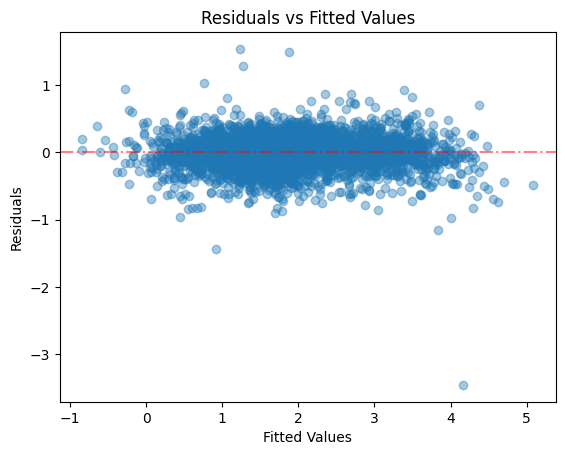

In [ ]:
# Checking the Linearity of Variables with Residuals vs Fitted Values
plt.scatter(model.fittedvalues, model.resid, alpha=0.4)
plt.axhline(0, color = 'r', alpha = 0.5, linestyle = '-.')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

**Observation:**

* The is no distinct pattern in the plot and are scattered around the horizontal axis, therefore this assumption is satisfied.

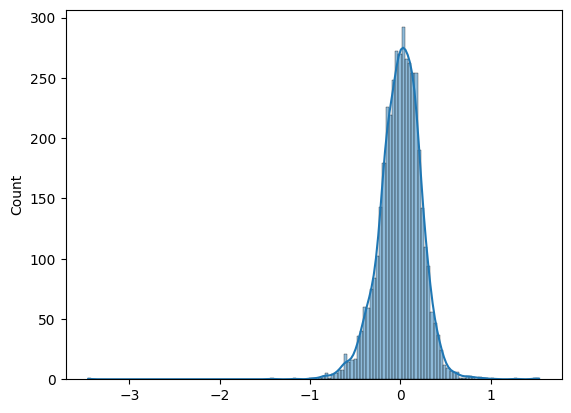

In [ ]:
# Checking the Normality of Error Terms
sns.histplot(model.resid, kde = True)
plt.show()

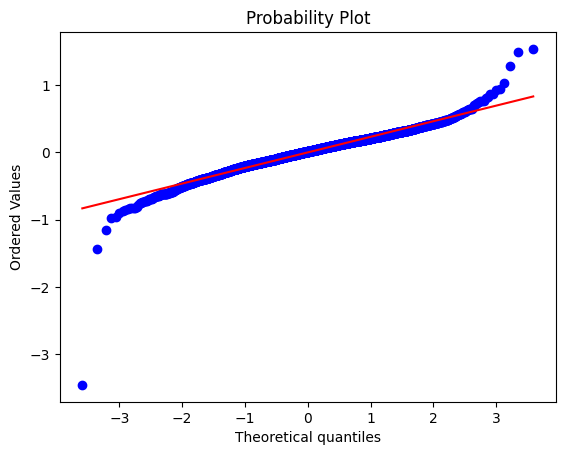

In [ ]:
# Plotting Q-Q of residuals
stats.probplot(model.resid, dist = 'norm', plot = pylab)
plt.show()

**Observation:**

* Both plots of residuals follow a normal distribution, therefore this assumption is satisfied.

In [ ]:
# Calculating the coef and pvalues
olsmod = pd.DataFrame(model.params, columns = ['coef'])
olsmod['pval'] = model.pvalues

olsmod = olsmod.sort_values(by = "pval", ascending = True)
pval_filter = olsmod['pval']<= 0.05
olsmod[pval_filter]

,coef,pval
Power,0.006197,0.000000e+00
Age,-0.119957,0.000000e+00
Fuel_Type_Petrol,-0.331008,2.759781e-170
Mileage,-0.021719,1.565971e-39
const,3.288557,3.046887e-37
Location_Kolkata,-0.254030,1.935096e-28
Transmission_Manual,-0.125439,3.606919e-24
log_Kilometers_Driven,-0.061812,2.101213e-18
Fuel_Type_Green,-0.265409,7.124813e-14
Owner_Type_Second,-0.065240,2.310844e-09


**Observation:**

* From the OLS model there are a multitude of features that affect the log_Price with Power, Age, and Fuel type being at the top of the list.
  * The order of this list is a great representation of what features one would be looking for when determining the value of a vehicle.

In [ ]:
# Determining the most significant varaibles, after reversing OHE
pval_filter = olsmod['pval']<= 0.05
imp_vars = olsmod[pval_filter].index.tolist()

sig_var = []
for col in imp_vars:
    if '' in col:
        first_part = col.split('_')[0]
        for c in df.columns:
            if first_part in c and c not in sig_var :
                sig_var.append(c)

print('Most overall significant categorical varaibles of LINEAR REGRESSION  are '':\n', sig_var)

Most overall significant categorical varaibles of LINEAR REGRESSION  are :
 ['Power', 'Age', 'Fuel_Type', 'Mileage', 'Location', 'Transmission', 'log_Price', 'log_Kilometers_Driven', 'Owner_Type', 'Seats', 'Brand']


**Observation:**

* For a more interpretable view of the features that are have the highest relevance in log_Price, with the OHE removed, are as above, essentially indicating on some level each of the columns in the data are important when prediciting the price of a used vehcile.

In [ ]:
# Calculating the equation for OLS Regression
coef = model.params
Equation = "Used Car Price predictor="
print(Equation, end='\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

Used Car Price predictor=	( 3.28855679203217 ) *  const + ( -0.021718954291465833 ) *  Mileage + ( 0.006197108753134922 ) *  Power + ( -0.11995739705565653 ) *  Age + ( -0.06181223831090821 ) *  log_Kilometers_Driven + ( 0.13380340177259764 ) *  Location_Bangalore + ( 0.00922629672324964 ) *  Location_Chennai + ( 0.07844185640902962 ) *  Location_Coimbatore + ( -0.07116035590525308 ) *  Location_Delhi + ( 0.08690784016243555 ) *  Location_Hyderabad + ( -0.07815092930859022 ) *  Location_Jaipur + ( -0.05614988546141408 ) *  Location_Kochi + ( -0.2540298562972728 ) *  Location_Kolkata + ( -0.059076621598176005 ) *  Location_Mumbai + ( -0.05847437312258835 ) *  Location_Pune + ( -0.265408905723583 ) *  Fuel_Type_Green + ( -0.3310075435099559 ) *  Fuel_Type_Petrol + ( -0.12543907389207865 ) *  Transmission_Manual + ( 0.10863721415747042 ) *  Owner_Type_Fourth & Above + ( -0.06524031080995604 ) *  Owner_Type_Second + ( -0.11600815263380483 ) *  Owner_Type_Third + ( 0.038896424486528414 ) * 

**Observation:**

* The equation is as follows:

**$\log($Price$)$ = $3.3275 - 0.0217 *$ Mileage$ + 0.0062 *$ Power$ - 0.1200 *$ Age$ - 0.0618 *$ log(Kilometers Driven)$ + 0.1338 *$ Location_Bangalore$ + 0.0092 *$ Location_Chennai$ + 0.0784 *$ Location_Coimbatore$ - 0.0712 *$ Location_Delhi$ + 0.0869 *$ Location_Hyderabad$ - 0.0782 *$ Location_Jaipur$ - 0.0561 *$ Location_Kochi$ - 0.2540 *$ Location_Kolkata$ - 0.0591 *$ Location_Mumbai$ - 0.0585 *$ Location_Pune$ - 0.2654 *$ Fuel_Type_Green$ - 0.3310 *$ Fuel_Type_Petrol$ - 0.1254 *$ Transmission_Manual$ + 0.1086 *$ Owner_Type_Fourth_Above$ - 0.0652 *$ Owner_Type_Second$ - 0.1160 *$ Owner_Type_Third$ - 0.0389 *$ Seats_<5$
+ 0.1364 *$ Seats_>5$ + 0.3967 *$ Brand_Audi$ + 0.3778 *$ Brand_BMW$ - 0.4869 *$ Brand_Chevrolet$ - 0.6050 *$ Brand_Datsun$ - 0.4729 *$ Brand_Fiat$ - 0.0437 *$ Brand_Force$ - 0.2285 *$ Brand_Ford$ - 0.1028 *$ Brand_Honda$ - 0.1653 *$ Brand_Hyundai$ - 0.3320 *$ Brand_Isuzu$ + 0.4424 *$ Brand_Jaguar$ - 0.0050 *$ Brand_Jeep$ + 0.6551 *$ Brand_Land_Rover$ - 0.3303 *$ Brand_Mahindra$ - 0.1621 *$ Brand_Maruti$ + 0.4572 *$ Brand_Mercedes-Benz$ + 0.8617 *$ Brand_Mini_Cooper$ + 0.0510 *$ Brand_Mitsubishi$ - 0.1633 *$ Brand_Nissan$ + 0.1134 *$ Brand_Porsche$ - 0.2287 *$ Brand_Renault$ - 0.0917 *$ Brand_Skoda$ - 0.0867 *$ Brand_Smart$ - 0.6516 *$ Brand_Tata$ + 0.0808 *$ Brand_Toyota$ - 0.1873 *$ Brand_Volkswagen$ + 0.2147 *$ Brand_Volvo**

### **Linear Regression**

In [ ]:
# Initialize and fitting the model
model2 = LinearRegression()
model2.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Checking performance on the training data
linear_reg_train = model_evaluation(model2, X_train, y_train)
linear_reg_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.23748,4.27634,1.801545,18.941423,0.924201,0.925102


In [ ]:
# Checking performance on the testing data
linear_reg = model_evaluation(model2, X_test, y_test)
linear_reg

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.240494,3.850208,1.723046,18.856404,0.924803,0.926888


**Observation:**

* RMSE and Adj-R-Squared of the training and test data are very close indicating we are not overfitting on the training data.
* R-squared of 0.92 indicated the independent variables are explaining approximately 92% of the variance in the dependent variable.

### **Regularization**

#### **Ridge Regresstion**

#### Default Parameters

In [ ]:
# Initialize and fitting the model
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

Ridge()

In [ ]:
# Checking performance on the training data
ridge_reg_train = model_evaluation(ridge_model, X_train, y_train)
ridge_reg_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.237572,4.302193,1.803718,18.937261,0.924142,0.925043


In [ ]:
# Checking performance on the testing data
ridge_reg = model_evaluation(ridge_model, X_test, y_test)
ridge_reg

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.240594,3.879089,1.728886,18.865793,0.92474,0.926827


**Observation:**

* No large improvement utlizing Ridge Regression Penalty by reducing the complexity of the model, our metrics are very simliar to the Least Squares model.

#### Optimized $\large\alpha$

In [ ]:
# Applying Grid Search CV
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model3 = Ridge()
model_cv = GridSearchCV(estimator=model3, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Determining the optimized parameter for alpha
model_cv.best_params_

{'alpha': 1}

In [ ]:
# Initalizing and fitting model with optimzed alpha
ridge_model_tuned = Ridge(alpha=0.1)
ridge_model_tuned.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
# Checking performance on the testing data
ridge_reg_tuned_train = model_evaluation(ridge_model_tuned, X_train, y_train)
ridge_reg_tuned_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.237481,4.278573,1.801626,18.939782,0.9242,0.925101


In [ ]:
# Checking performance on the testing data
ridge_reg_tuned = model_evaluation(ridge_model_tuned, X_test, y_test)
ridge_reg_tuned

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.240515,3.860307,1.724715,18.858711,0.924789,0.926875


**Observation:**

* The biased introduced to improve predictions, even with tuned parameters did not result in an improvement in model metrics.

#### **Lasso Regression**

#### Default Parameters

In [ ]:
# Initialize and fitting the model
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)

Lasso()

In [ ]:
# Checking performance on the training data
lasso_reg_train = model_evaluation(lasso_model, X_train, y_train)
lasso_reg_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.481868,23.108287,4.369346,44.409701,0.687918,0.691628


In [ ]:
# Checking performance on the testing data
lasso_reg = model_evaluation(lasso_model, X_test, y_test)
lasso_reg

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.485238,38.165999,5.297975,43.178393,0.693871,0.702361


**Observation:**

* We have very poor performance with the default alpha, there was significantly higher scores with previous models and overfitting.

#### Optimized $\large\alpha$

In [ ]:
# Applying Grid Search CV
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5,10,20]}
model4 = Lasso()
model_cv = GridSearchCV(estimator=model4, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1, 5, 10,
                                   20]},
             return_train_score=True, scoring='r2')

In [ ]:
# Determining the optimized parameter for alpha
model_cv.best_params_

{'alpha': 0.001}

In [ ]:
# Initalizing and fitting model with optimzed alpha
lasso_model_tuned = Lasso(alpha=0.001)
lasso_model_tuned.fit(X_train, y_train)

Lasso(alpha=0.001)

In [ ]:
# Checking performance on the training data
lasso_reg_tuned_train = model_evaluation(lasso_model_tuned, X_train, y_train)
lasso_reg_tuned_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.243968,4.638497,1.881955,19.425266,0.920002,0.920953


In [ ]:
# Checking performance on the testing data
lasso_reg_tuned = model_evaluation(lasso_model_tuned, X_test, y_test)
lasso_reg_tuned

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.246401,4.266983,1.81105,19.278338,0.921063,0.923252


**Observation:**

* Despite adding the penalty and utilizing the optimized alpha value, the performance of Lasso is close but lower than Least Squares and Ridge.

#### **Elastic Net Regression**

#### Default Parameters

In [ ]:
# Initialize and fitting the model
elasticnet_model = ElasticNet()
elasticnet_model.fit(X_train, y_train)

ElasticNet()

In [ ]:
# Checking performance on the training data
elasticnet_reg_train = model_evaluation(elasticnet_model, X_train, y_train)
elasticnet_reg_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.407009,21.669491,3.851087,35.716379,0.777351,0.779998


In [ ]:
# Checking performance on the testing data
elasticnet_reg = model_evaluation(elasticnet_model, X_test, y_test)
elasticnet_reg

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.408692,34.041105,4.615497,33.988265,0.782837,0.788859


**Observation**

* The performance is low with the default alpha, the L1 penalty does not yield better results.

#### Optimized $\large\alpha$

In [ ]:
# Applying Grid Search CV
folds = KFold(n_splits=10, shuffle=True, random_state=1)
params = {'alpha':[0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]}
model5 = ElasticNet()
model_cv = GridSearchCV(estimator=model5, param_grid=params, scoring='r2', cv=folds, return_train_score=True)
model_cv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
             estimator=ElasticNet(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9],
                         'l1_ratio': [0.001, 0.01, 0.02, 0.03, 0.04, 0.05]},
             return_train_score=True, scoring='r2')

In [ ]:
# Determining the optimized parameter for alpha
model_cv.best_params_

{'alpha': 0.001, 'l1_ratio': 0.001}

In [ ]:
# Initalizing and fitting model with optimzed alpha
elasticnet_model_tuned = ElasticNet(alpha=0.001, l1_ratio=0.05)
elasticnet_model_tuned.fit(X_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.05)

In [ ]:
# Checking performance on the training data
elasticnet_reg_tuned_train = model_evaluation(elasticnet_model_tuned, X_train, y_train)
elasticnet_reg_tuned_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.2387,4.407896,1.82629,19.023543,0.92342,0.92433


In [ ]:
# Checking performance on the testing data
elasticnet_reg_tuned = model_evaluation(elasticnet_model_tuned, X_test, y_test)
elasticnet_reg_tuned

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.241597,3.982636,1.747975,18.934723,0.924111,0.926216


**Observation:**

* Even with the optimized alpha at 0.001 and L1 ratio at 0.05 the performance of the model is just about equal as with Least Squares and Ridge.  

In [ ]:
# Combine all test results from regression models
models= pd.concat([linear_reg,ridge_reg,ridge_reg_tuned,lasso_reg,lasso_reg_tuned,elasticnet_reg,
                   elasticnet_reg_tuned], axis=0)
models['Models'] = ['Least Squares', 'Ridge Regression', 'Ridge Regression Tuned', 'Lasso Regression',
                                      'Lasso Regression Tuned', 'Elastic Net Regression',
                    'Elastic Net Regression Tuned']
models = models.iloc[:,[6, 0,1,2,3,4,5]] #ordering names of the models as the first column
models

,Models,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,Least Squares,0.240494,3.850208,1.723046,18.856404,0.924803,0.926888
0,Ridge Regression,0.240594,3.879089,1.728886,18.865793,0.924740,0.926827
0,Ridge Regression Tuned,0.240515,3.860307,1.724715,18.858711,0.924789,0.926875
0,Lasso Regression,0.485238,38.165999,5.297975,43.178393,0.693871,0.702361
0,Lasso Regression Tuned,0.246401,4.266983,1.811050,19.278338,0.921063,0.923252
0,Elastic Net Regression,0.408692,34.041105,4.615497,33.988265,0.782837,0.788859
0,Elastic Net Regression Tuned,0.241597,3.982636,1.747975,18.934723,0.924111,0.926216


**Observation:**

* The best two fitting models Least Squares and Ridge Tunned are nearly identical in performance, but Ridge, Elastic Net Tuned, are also extremely close, and with that Lasso Tuned is right behind them. There is not added improvement with the many techinques applied from these modeling methods.

### Forward Feature Selection using SequentialFeatureSelector

In [ ]:
# Initializing and fitting the model
reg = LinearRegression()
sfs = SFS(
    reg,
    k_features=X_train.shape[1],
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.9s finished

[2024-04-01 15:41:23] Features: 1/50 -- score: 0.578843903147656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.2s finished

[2024-04-01 15:41:23] Features: 2/50 -- score: 0.8155919994547391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished

[2024-04-01 15:41:23] Features: 3/50 -- score: 0.8413012412174105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  47 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s 

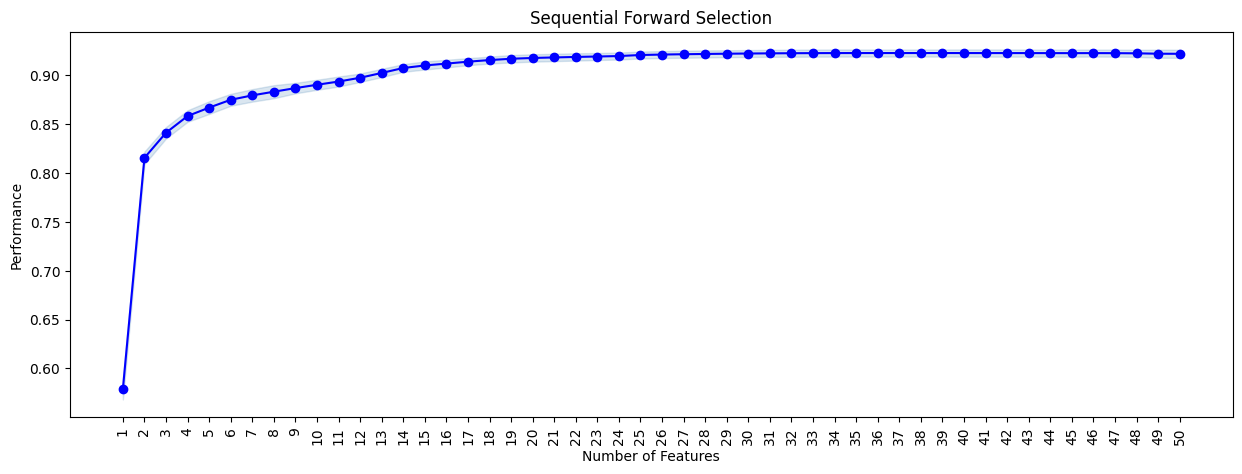

In [ ]:
# Plotting the performance
fig1 = plot_sfs(sfs.get_metric_dict(), kind = 'std_err', figsize = (15, 5))
plt.title('Sequential Forward Selection')
plt.xticks(rotation = 90)
plt.show()

**Observation:**

* It looks like at about 14 features the performance becomes nearly a constant at about 0.92
* Roughly 7 features reduces model complexity with only sacrificing performance to about 0.88
* And for a far more simple model with still 0.85 Rsquared you could use 4 features.
* Additonal stakeholder input would be advised for this decision, but for exploratory purposes we will run all three: 14, 7, 4.

In [ ]:
# Running 14 features
reg = LinearRegression()
sfs = SFS(reg,
    k_features=14,
    forward=True,
    floating=False,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    cv=5,
)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished

[2024-04-01 15:42:45] Features: 1/14 -- score: 0.578843903147656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.2s finished

[2024-04-01 15:42:45] Features: 2/14 -- score: 0.8155919994547391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished

[2024-04-01 15:42:45] Features: 3/14 -- score: 0.8413012412174105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished

[2024-04-01 15:42:45] Features: 4/14 -- score: 0.8583984411173635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent w

In [ ]:
# Identifiying important features
feat_cols_14 = list(sfs.k_feature_idx_)
print(feat_cols_14)

[1, 2, 3, 12, 16, 17, 23, 24, 25, 35, 38, 39, 46, 47]


In [ ]:
# Checking the names of the important features
X_train.columns[feat_cols_14]

Index(['Mileage', 'Power', 'Age', 'Location_Kolkata', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Brand_audi', 'Brand_bmw', 'Brand_chevrolet',
       'Brand_land rover', 'Brand_mercedes-benz', 'Brand_mini cooper',
       'Brand_tata', 'Brand_toyota'],
      dtype='object')

In [ ]:
# Applying features to train data
X_train_final_14 = X_train[X_train.columns[feat_cols_14]]

In [ ]:
# Applying features to test data
X_test_final_14 = X_test[X_train_final_14.columns]

In [ ]:
# Running model with selected features
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final_14, y_train)

LinearRegression()

In [ ]:
# Checking performance on the training data
lin_reg_model2_train_perf_14 = model_evaluation(lin_reg_model2, X_train_final_14, y_train)
lin_reg_model2_train_perf_14

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.262279,4.622352,1.95694,20.979648,0.908337,0.908642


In [ ]:
# Checking performance on the testing data
lin_reg_model2_test_perf_14 = model_evaluation(lin_reg_model2, X_test_final_14, y_test)
lin_reg_model2_test_perf_14

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.263244,4.254052,1.896482,20.776054,0.911716,0.912401


**Observation:**

* Values look solid with 14 features, slightly lower Rsqaured value, but overall strong model.

In [ ]:
# Running 7 features
reg = LinearRegression()
sfs = SFS(
    reg,
    k_features=7,
    forward=True,
    floating=False,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    cv=5,
)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished

[2024-04-01 15:43:58] Features: 1/7 -- score: 0.578843903147656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.2s finished

[2024-04-01 15:43:59] Features: 2/7 -- score: 0.8155919994547391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished

[2024-04-01 15:43:59] Features: 3/7 -- score: 0.8413012412174105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished

[2024-04-01 15:43:59] Features: 4/7 -- score: 0.8583984411173635[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent worke

In [ ]:
# Identifiying important features
feat_cols_7 = list(sfs.k_feature_idx_)
print(feat_cols_7)

[1, 2, 3, 12, 16, 17, 46]


In [ ]:
# Checking the names of the important features
X_train.columns[feat_cols_7]

Index(['Mileage', 'Power', 'Age', 'Location_Kolkata', 'Fuel_Type_Petrol',
       'Transmission_Manual', 'Brand_tata'],
      dtype='object')

In [ ]:
# Applying features to train data
X_train_final_7 = X_train[X_train.columns[feat_cols_7]]

In [ ]:
# Applying features to test data
X_test_final_7 = X_test[X_train_final_7.columns]

In [ ]:
# Running model with selected features
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final_7, y_train)

LinearRegression()

In [ ]:
# Checking performance on the training data
lin_reg_model2_train_perf_7 = model_evaluation(lin_reg_model2, X_train_final_7, y_train)
lin_reg_model2_train_perf_7

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.300098,6.368399,2.440818,24.61523,0.880197,0.880396


In [ ]:
# Checking performance on the testing data
lin_reg_model2_test_perf_7 = model_evaluation(lin_reg_model2, X_test_final_7, y_test)
lin_reg_model2_test_perf_7

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.295753,6.286287,2.3598,23.43253,0.888999,0.88943


**Observation:**

* Slight worse Rquared value.

In [ ]:
# Running 4 features
reg = LinearRegression()
sfs = SFS(
    reg,
    k_features=4,
    forward=True,
    floating=False,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    cv=5,
)
sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.1s finished

[2024-04-01 15:44:49] Features: 1/4 -- score: 0.578843903147656[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 out of  49 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  49 out of  49 | elapsed:    0.2s finished

[2024-04-01 15:44:49] Features: 2/4 -- score: 0.8155919994547391[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    0.2s finished

[2024-04-01 15:44:50] Features: 3/4 -- score: 0.8413012412174105[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  47 out of  47 | elapsed:    0.2s finished

[2024-04-01 15:44:50] Features: 4/4 -- score: 0.8583984411173635

In [ ]:
# Identifiying important features
feat_cols_4 = list(sfs.k_feature_idx_)
print(feat_cols_4)

[2, 3, 16, 17]


In [ ]:
# Checking the names of the important features
X_train.columns[feat_cols_4]

Index(['Power', 'Age', 'Fuel_Type_Petrol', 'Transmission_Manual'], dtype='object')

In [ ]:
# Applying features to train data
X_train_final_4 = X_train[X_train.columns[feat_cols_4]]

In [ ]:
# Applying features to test data
X_test_final_4 = X_test[X_train_final_4.columns]

In [ ]:
# Running model with selected features
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(X_train_final_4, y_train)

LinearRegression()

In [ ]:
# Checking performance on the training data
lin_reg_model2_train_perf_4 = model_evaluation(lin_reg_model2, X_train_final_4, y_train)
lin_reg_model2_train_perf_4

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.325885,8.436837,2.632979,27.067474,0.858824,0.858958


In [ ]:
# Checking performance on the testing data
lin_reg_model2_test_perf_4 = model_evaluation(lin_reg_model2, X_test_final_4, y_test)
lin_reg_model2_test_perf_4

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.329703,9.588503,2.737415,26.296819,0.862282,0.862588


**Observation:**

* While definetely not as strong as the best model with Least Squares, for using 4 features its a fairly strong model, and what it lacks in performance it makes up for in simplicity.

In [ ]:
# Confirming common features
common_features = set(feat_cols_4) & set(feat_cols_7) & set(feat_cols_14)
common_features_list = list(common_features)
common_features_list

[16, 17, 2, 3]

In [ ]:
# Checking the names of the important features
X_train.columns[common_features_list]

Index(['Fuel_Type_Petrol', 'Transmission_Manual', 'Power', 'Age'], dtype='object')

In [ ]:
# Checking testing performance across feature selection
models_test_comp_df = pd.concat(
    [linear_reg.T, lin_reg_model2_test_perf_14.T, lin_reg_model2_test_perf_7.T, lin_reg_model2_test_perf_4.T], axis=1,
)
models_test_comp_df.columns = [
    'Least Squares',
    'LS: SFS 14',
    'LS: SFS 7',
    'LS: SFS 4',
]
models_test_comp_df.T

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
Least Squares,0.240494,3.850208,1.723046,18.856404,0.924803,0.926888
LS: SFS 14,0.263244,4.254052,1.896482,20.776054,0.911716,0.912401
LS: SFS 7,0.295753,6.286287,2.359800,23.432530,0.888999,0.889430
LS: SFS 4,0.329703,9.588503,2.737415,26.296819,0.862282,0.862588


**Observation:**

* The performance values range from 0.926 to 0.862, all acceptable Rsquared values.
* We can see that Age, Power, Petrol, and Manual Transmission are the key components in this feature selection.  
* The reduction in complexity does come at a cost to performance, but identifying these key components are certainly useful to make quick decisions perhaps for instance at an auction of vehicles.

## **Tree Based Models**

#### **Decision Tree Regressor**

In [ ]:
# Initalizing and fitting model
dt_regressor = DecisionTreeRegressor(random_state = 1)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [ ]:
# Checking performance on the training data
dt_regressor_perf_train = model_evaluation(dt_regressor, X_train, y_train)
dt_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.002421,0.007816,0.000435,0.011742,0.999992,0.999992


In [ ]:
# Checking performance on the testing data
dt_regressor_perf_test = model_evaluation(dt_regressor, X_test, y_test)
dt_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.29642,5.009531,2.001947,21.045314,0.885763,0.888931


**Observation:**

* Overall the metrics are stong, there is some overfitting, and while this is common in DT hopefully the tuning or pruning will provide better generalization.

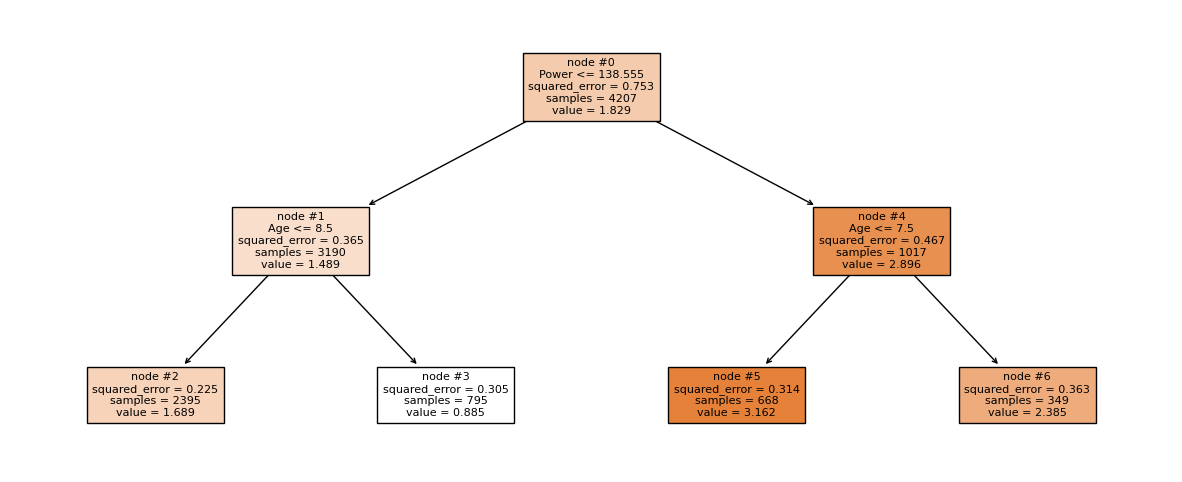

In [ ]:
# Displaying Decision Tree
features = list(X_train.columns)
dt_regressor_visualize = DecisionTreeRegressor(random_state = 1, max_depth= 2)
dt_regressor_visualize.fit(X_train, y_train)

plt.figure(figsize = (15, 6))
tree.plot_tree(dt_regressor_visualize, feature_names = features, filled = True, fontsize = 8,
               node_ids = True, class_names = True)
plt.show()

In [ ]:
print(tree.export_text(dt_regressor_visualize, feature_names=X_train.columns.tolist(), show_weights=True))

|--- Power <= 138.56
|   |--- Age <= 8.50
|   |   |--- value: [1.69]
|   |--- Age >  8.50
|   |   |--- value: [0.89]
|--- Power >  138.56
|   |--- Age <= 7.50
|   |   |--- value: [3.16]
|   |--- Age >  7.50
|   |   |--- value: [2.39]



In [ ]:
# Isolating leaf node values
tree_ = dt_regressor_visualize.tree_
leaf_values = [tree_.value[i] for i in range(tree_.node_count) if tree_.children_left[i] == -1 and tree_.children_right[i] == -1]
for value in leaf_values:
    print(value)

[[1.6890315]]
[[0.88527094]]
[[3.16240364]]
[[2.38535615]]


In [ ]:
# Converting leaf node values to original Price scale
original_scale_values = [np.exp(value) for value in leaf_values]
for value in original_scale_values:
    print(np.round(value, 2))

[[5.41]]
[[2.42]]
[[23.63]]
[[10.86]]


**Observation:**

* A max depth of 2 was choosen, adding an additional depth only created more instances where different levels of power were used for classification. The simplicity of the model is key, which is maximized at 2.
* The Power of the vehicle results in the highest information gain.  
  * A Power is split at less than or equal to 138.55
* The internal node is Age based.
  * The intermediate nodes are Age less than or equal to 8.50 and Age less than or equal to 7.5 respectively.

**Results:**
* If a vehicle has less than or equal to 138.55 Power, and an Age of less than or equal to 8.5 years, the predicted Price value of the vehicle is 5.41 per 100,000 INR.
* If a vehicle has less than or equal to 138.55 Power, and an Age of more than 8.5 years, the predicted Price value of the vehicle is 2.42 per 100,000 INR.
* If a vehicle has more than 138.55 Power, and an Age of less than or equal to 7.5 years, the predicted Price value of the vehicle is 23.63 per 100,000 INR.
* If a vehicle has more than 138.55 Power, and an Age more than 7.5 years, the predicted Price value of the vehicle is 10.86 per 100,000 INR.

**Indicaiton:**
* High power, low age vehicles have the highest prices.

#### **Hyperparameter Tuning: Decision Tree**

In [ ]:
# Applying Grid Search CV and determining the hyperparameters
dt_regressor = DecisionTreeRegressor(random_state=1)
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

print('Best parameters:', grid_search.best_params_)
print('Best score:', -grid_search.best_score_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.08142699878875587


In [ ]:
# Initalizing and fitting model with hyperparameters
dt_regressor_optimized = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
dt_regressor_optimized.fit(X_train, y_train)

DecisionTreeRegressor(max_features='auto', min_samples_leaf=2,
                      min_samples_split=10, random_state=42)

In [ ]:
# Checking performance on the training data
dt_tuned_regressor_perf_train = model_evaluation(dt_regressor_optimized, X_train, y_train)
dt_tuned_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.146275,2.765776,1.021665,10.241597,0.971243,0.971584


In [ ]:
# Checking performance on the testing data
dt_tuned_regressor_perf_test = model_evaluation(dt_regressor_optimized, X_test, y_test)
dt_tuned_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.282875,5.274264,1.976493,20.245171,0.895964,0.898849


**Observation:**

* Hyperparameter tunning for the DT resulted again in a minimal amount of overfitting.  While 0.971 and 0.898 is an improvement from the basic DT, as well as the RMSE difference has impoved some. Model performance is still strong.

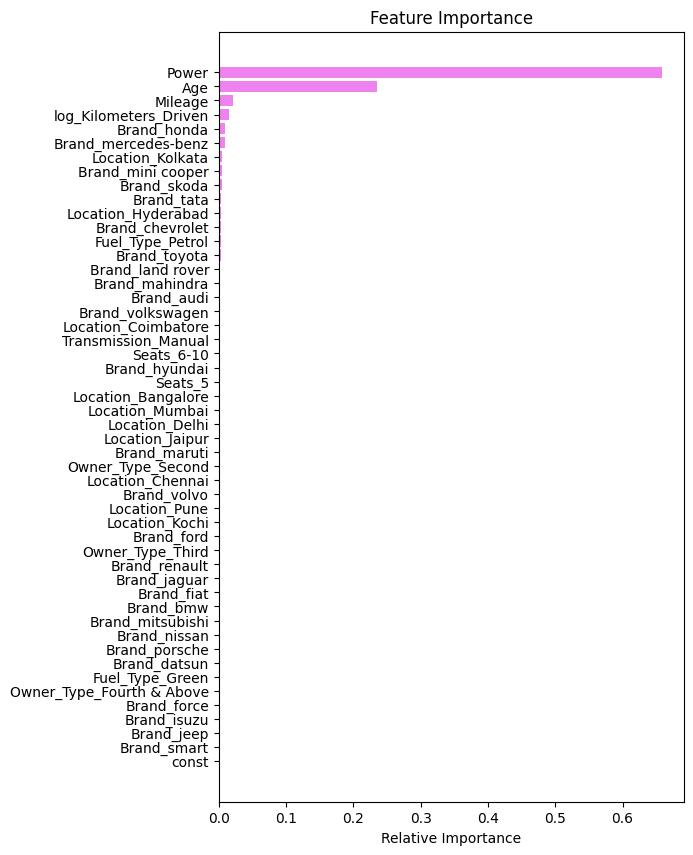

In [ ]:
# Plotting the most important features in the Decision Tree Tuned model
features = list(X_train.columns)
importances = dt_regressor_optimized.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6, 10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**

* The most relevant features for the Tuned Decision Tree are Power, Age, Mileage, and log_Kilometers_Driven.

### **Ensemble Methods:**

#### **Bagging Regressor**

In [ ]:
# Initalizing and fitting model
bagging_estimator = BaggingRegressor(random_state = 1)
bagging_estimator.fit(X_train, y_train)

BaggingRegressor(random_state=1)

In [ ]:
# Checking performance on the training data
bagging_estimator_perf_train = model_evaluation(bagging_estimator, X_train, y_train)
bagging_estimator_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.098252,2.117735,0.680869,6.555003,0.987025,0.98718


In [ ]:
# Checking performance on the testing data
bagging_estimator_perf_test = model_evaluation(bagging_estimator, X_test, y_test)
bagging_estimator_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.241694,4.926363,1.668169,16.457598,0.92405,0.926157


**Observation:**

* Multiple on different trained subsets, to reduce overfitting and variance, with the same bias results in a 0.987 and a 0.926 Rsquared. There is an improvement in overfitting here. Strong model.

#### **Random Forest Regressor**

In [ ]:

rf_regressor = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [ ]:
# Checking performance on the training data
rf_regressor_perf_train = model_evaluation(rf_regressor, X_train, y_train)
rf_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.083085,1.765457,0.584161,5.689686,0.990722,0.990832


In [ ]:
# Checking performance on the testing data
rf_regressor_perf_test = model_evaluation(rf_regressor, X_test, y_test)
rf_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.227319,4.61222,1.568758,15.653517,0.932816,0.934679


**Observation:**

* By combining the predictions of multiple DT by average, with randomly selected features, results in a 0.990 and a 0.934 Rsquared. We can see the overfitting coming out little more again, but strong R2 here.

#### **AdaBoost Regressor**

In [ ]:
# Initalizing and fitting model
ada_regressor = AdaBoostRegressor(random_state=1)
ada_regressor.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [ ]:
# Checking performance on the training data
ada_regressor_perf_train = model_evaluation(ada_regressor, X_train, y_train)
ada_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.321268,5.321501,2.510569,26.44361,0.861278,0.862927


In [ ]:
# Checking performance on the testing data
ada_regressor_perf_test = model_evaluation(ada_regressor, X_test, y_test)
ada_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.342986,6.214535,2.704244,27.384615,0.847051,0.851292


**Observation:**

* The combination of weak classifers to create stronger classifers leading to improved accuracy in the difficult to classify results in a 0.862 and 0.851 Rsquared. While the overfitting is greatly improved it's at a cost to the performance.

#### **Gradient Boost Regressor**

In [ ]:
# Initalizing and fitting model
grad_regressor = GradientBoostingRegressor(random_state=1)
grad_regressor.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [ ]:
# Checking performance on the training data
grad_regressor_perf_train = model_evaluation(grad_regressor, X_train, y_train)
grad_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.200219,3.121439,1.466118,15.70762,0.946121,0.946761


In [ ]:
# Checking performance on the testing data
grad_regressor_perf_test = model_evaluation(grad_regressor, X_test, y_test)
grad_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.231389,4.241962,1.687654,17.325692,0.930388,0.932319


**Observation:**

* By combining weak learners and assigning weights to data points to focus on the improvement of previously poorly predicted results in a 0.946 and a 0.932 Rsquared. This is the best models so far, stong R2, much less overfitting.

#### **XGBoost Regressor**

In [ ]:
# Initalizing and fitting model
xgb = XGBRegressor(random_state = 1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=1, ...)

In [ ]:
# Checking performance on the training data
xgb_perf_train = model_evaluation(xgb, X_train, y_train)
xgb_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.07988,1.003363,0.535463,6.063031,0.991424,0.991526


In [ ]:
# Checking performance on the testing data
xgb_perf_test = model_evaluation(xgb, X_test, y_test)
xgb_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.213271,4.419197,1.420555,14.04905,0.940863,0.942503


**Observation:**

* Based on the residual of errors of the previous model, sequentially adding and updating weights, along with regularization, pruning, and weighted quantile sketch results in a 0.991 and a 0.940 Rsquared values.  Higher R2 but overfitting has increased again.

#### **Hyperparameter Tuning: Random Forest**

In [ ]:
# Applying Grid Search CV and determining the hyperparameters
rf_tuned = RandomForestRegressor(random_state = 1)
rf_parameters = {"n_estimators": [100, 110, 120],
    "max_depth": [5, 7, None],
    "max_features": [0.8, 1]
             }
rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv = 5)
rf_grid_obj = rf_grid_obj.fit(X_train, y_train)
rf_tuned_regressor = rf_grid_obj.best_estimator_
rf_tuned_regressor.fit(X_train, y_train)

RandomForestRegressor(max_features=0.8, n_estimators=120, random_state=1)

In [ ]:
# Checking performance on the training data
rf_tuned_regressor_perf_train = model_evaluation(rf_tuned_regressor, X_train, y_train)
rf_tuned_regressor_perf_train

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.08188,1.713455,0.577361,5.593296,0.990989,0.991096


In [ ]:
# Checking performance on the testing data
rf_tuned_regressor_perf_test = model_evaluation(rf_tuned_regressor, X_test, y_test)
rf_tuned_regressor_perf_test

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
0,0.2234,4.612786,1.573492,15.503475,0.935113,0.936912


**Observation:**

* Even with optimized hyperparameters RF results in a 0.991 and a 0.936 Rsquared with like the other models slighly higher levels overfitting.

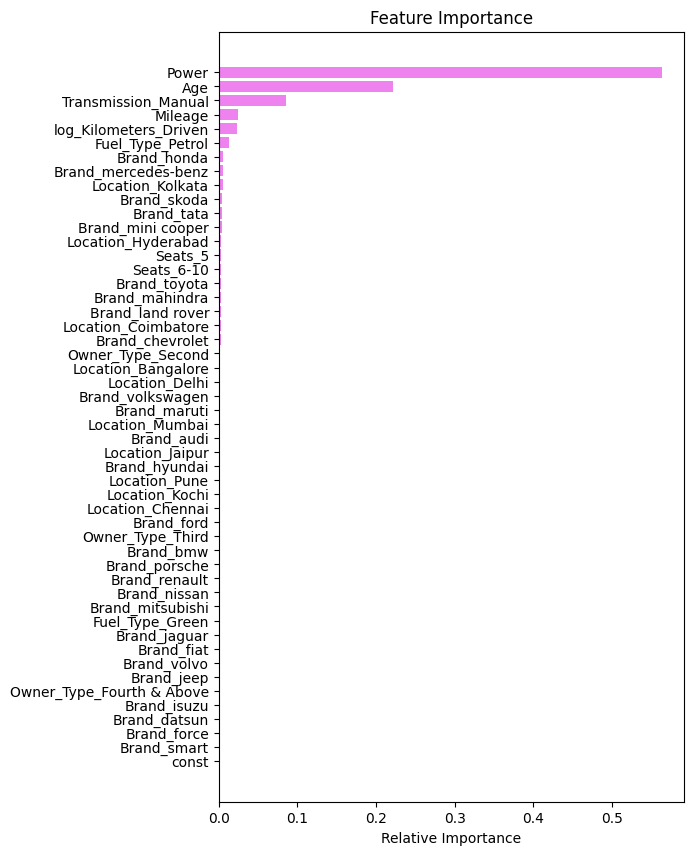

In [ ]:
# Plotting the most important features in the Random Forest Tuned model
features = list(X_train.columns)
importances = rf_tuned_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6, 10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**

* The most important features in the tuned Random Forest are; Power, Age, Manual Transmission, Mileage, and log_Kilometers_Driven.

In [ ]:
# Combining the test model performance
models_test_comp_df = pd.concat(
    [ dt_regressor_perf_test.T,
        dt_tuned_regressor_perf_test.T,
        bagging_estimator_perf_test.T,
        rf_regressor_perf_test.T,
        ada_regressor_perf_test.T,
        grad_regressor_perf_test.T,
        xgb_perf_test.T,
        rf_tuned_regressor_perf_test.T,
    ],
    axis = 1,
)
models_test_comp_df.columns = [
    'Decision Tree Regressor',
    'Decision Tree Tuned Regressor',
    'Bagging Regressor',
    'Random Forest regressor',
    'Ada Boost Regressor',
    'Gradient Boosting Regressor',
    'XG Boost Regressor',
    'Random Forest Tuned Regressor']
models_test_comp_df.T

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
Decision Tree Regressor,0.296420,5.009531,2.001947,21.045314,0.885763,0.888931
Decision Tree Tuned Regressor,0.282875,5.274264,1.976493,20.245171,0.895964,0.898849
Bagging Regressor,0.241694,4.926363,1.668169,16.457598,0.924050,0.926157
Random Forest regressor,0.227319,4.612220,1.568758,15.653517,0.932816,0.934679
Ada Boost Regressor,0.342986,6.214535,2.704244,27.384615,0.847051,0.851292
Gradient Boosting Regressor,0.231389,4.241962,1.687654,17.325692,0.930388,0.932319
XG Boost Regressor,0.213271,4.419197,1.420555,14.049050,0.940863,0.942503
Random Forest Tuned Regressor,0.223400,4.612786,1.573492,15.503475,0.935113,0.936912


In [ ]:
# Comparing the highest performing Regression model and the highest performing Regressor Model
models_test_comp_df = pd.concat([linear_reg_train.T, linear_reg.T, grad_regressor_perf_train.T, grad_regressor_perf_test.T], axis = 1)
models_test_comp_df.columns = ['Least Squares Regression Training Data Performance', 'Least Squares Regression Testing Data Performance',
                               'Gradient Boosting Regressor Training Data Performance', 'Gradient Boosting Regressor Testing Data Performance']
models_test_comp_df.T

,Log Scale RMSE,Bias Corrected RMSE,MAE,MAPE,Log Scale Adjusted R2,Log Scale R2
Least Squares Regression Training Data Performance,0.237480,4.276340,1.801545,18.941423,0.924201,0.925102
Least Squares Regression Testing Data Performance,0.240494,3.850208,1.723046,18.856404,0.924803,0.926888
Gradient Boosting Regressor Training Data Performance,0.200219,3.121439,1.466118,15.707620,0.946121,0.946761
Gradient Boosting Regressor Testing Data Performance,0.231389,4.241962,1.687654,17.325692,0.930388,0.932319


**Observation:**

* While not the highest of the Rsquared values or the lowest MAE or MAPE, the metrics of the Gradient Boosting Regressor Model are the best of the Regressor models, even with tuning and pruning.
* Gradient Boost also has the highest Rsquared and closest RMSE values of all models done on this dataset, and the second best is the Least Squares Model, at a slightly lower performance, but lowest overfitting as well.

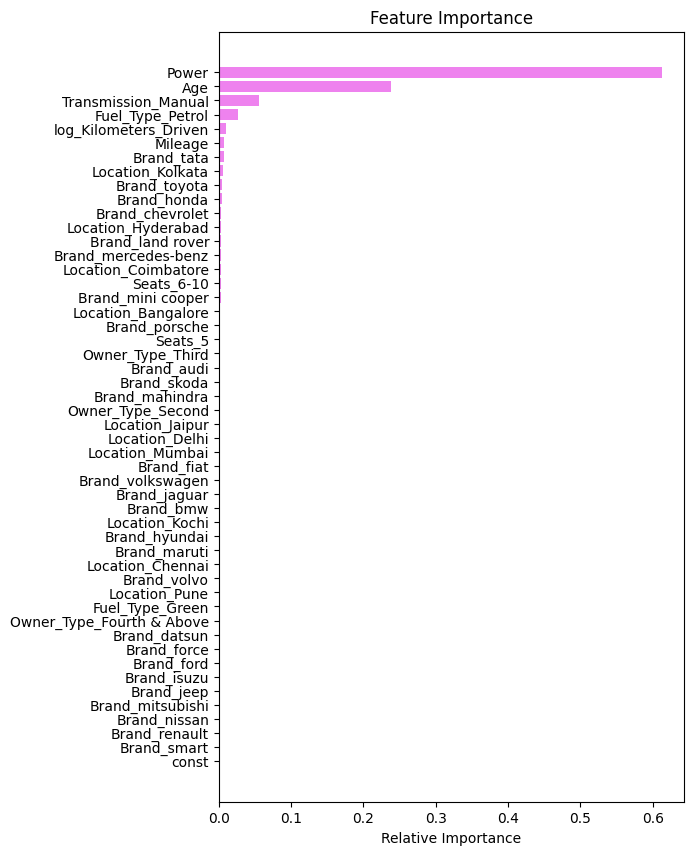

In [ ]:
# Plotting the most important features in the Gradient Boosting model
features = list(X_train.columns)
importances = grad_regressor.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (6, 10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Observation:**

* The most important features in the Gradient Boost model are Power, Age, Manual Transmisson, and Petrol Fuel_Type.
  * These are the same top 4 features as the Sequential Feature Selector.

## **Conclusions and Recommendations**

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?
  * Answer: Overall model performance across the board is realtively strong, minimal models yielded results that were below acceptable standards. While there was a consistenct lack of large scale improvement beyond the Least Squares model among the other Regularized Regression methods, some of the Tree Based models did show a higher performance.  While the performance is already higher, reccomendations to increase model performance are, as always, if possible increase dataset size. There were low respresenation in more niche Brands and Fuel_Types which were hard to generalize.  Perhaps being more agressive with removing outliers would have assisted performance, especially the MAPE scores.

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?
  * Answer:  The most meaningful insights were the relationships the data has within variables, and the value of the features determined by the models.
    * The determination of which Locations are the highest and lowest of specific variables leads to actionable insights for the buying and selling of used cars for profit.
      * The modeling did not provide further insight to ideal Locations, but it isolated key features to focus on.
    * The generalized statments that can be made about vehicle attributes and their relevance.
      * From the exploratory data analysis it appeared that Power, Engine, Age, and Mileage had the highest correlation with Price.
      * The top most important features generally were Power, Age, Fuel_Type, Transmission, and then Mileage and Kilometers_Driven.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?
  * Answer: The model with the best overall performance across the metrics was the Tree Based, specifically the Gradient Boosting Regressor. The sequential addition of weak learners to the model while updating the weights from the residual errors of the Adaboost significantly increased the Rsquare value and removed a substantial amount of overfitting. And while MAPE values would have been more ideal lower, Gradient Boosting did not compromise MAPE while increasing the performance in other areas. XGBoost Regressor also had promising performance, and while the MAPE values were lower, the overfitting increased.  Therefore the Gradient Boosting with a solid performance across the metrics without compromising other areas felt like the best model.

### **Recommendations**

The buying and selling of used cars is complicated market that is highly affected by inventory and locality.  Dynamic and differential pricing is required to create profit stability.  There are a wide array of factors that are incorporated in creating a used car price, a crucial aspect for a profitable resale.  Creating a model to predict sales price is highly useful for both ends.  Determining if a vehicle is priced low enough to purchase for resale, and priced high enough for market trends that will result in a profit is the entire buisness model for success.  

The ability to buy low and sell high is not soley based on price, but it's also based on demand.  The bulk of inventory should be marketable cars for consistent proftits that allows for further investments made in either higher risk reward inventroy or simply increased variety of inventory.

While market trends evolve quickly, the continued collection of data such as this is absolutely cruicial in the used car industry.  While attending an auction, quick decison are required for the greatest gain.  Having extensive knowledge of the key features that dictate pricing is paramount to making concise decisions about buying used vehicles.  

Locality plays are large role in the inventory available.  Affluent and low income areas have different trends as do cities versus rural areas.  Tracking geographical location nuiances allows a company to tap into inventory that other areas value higher increasing profits.  Buying low and selling high does not have to indicate overpricing, it's the knowledge of local market trends that creates differential pricing systems for maximum profitability.

Simple exploratory data analysis shows that Kolkata has the lowest average priced vehicles with the lowest age and kilometers driven.  This is confirmed by the above average vehicle counts and the low sum of total price.  Vehicles in this location appear to be newer with lower mileage (kilometers driven) and priced lower than other areas like Coimbatore, where the average price for their newer, low mileage (kilometers driven) vehicles is 2.5 times that of Kolkata.

All models also indicated the importance of a vehicles engine power.  Higher power yields higher prices.  And this plays a role in other attributes of the vehicles, diesel vehicles are higher power, and it even shows in that vehicles with lower mileage (mileage reported) yield a higher price.  The cascading effect of understanding the feature relevance is the domain knowledge that is required for effecitive decision making.

Creating a system where pricing reflects the value of the vehicle based on the standards of used vehicle sales has the potential to increase profit stability in a fluctuating industry.  This benfits the buyer, the seller, and the overall used vehicle market.  With ever increasing amounts of sales records and a solid model like the one created from this dataset the prediciton of used vehicle prices can feel less unpredictable and create the foundation of a successful used vehicle company.